This is the story telling part of my capstone project 2.  SC = Scoring Chances, HDGF = High Danger Goals, SC is shots from top of faceoff circles to dots angled to goal, HD is SC with rebound or odd man rush.  To begin with, I'll define some of the statistics I'll be using.  GP means Games Played, TOI means Time on Ice out of 60 minutes in a game, CF% refers to Corsi For %, where Corsi is a stat used to estimate puck possession based shots and Corsi For % is the ratio of a teams shots for versus a teams shots against when this player is on the ice, 50% is exactly even, GF% is Goals For % and is a ratio of a teams goals for versus goals against when this player is on the ice, again 50% is exactly even, HDGF% is High Danger Goals For % and is a ratio of goals for versus against specifically near the goal or High Danger area, again 50% is exactly even, PDO refers to "luck" and is calculated by adding a team's shooting percentage and the team's save percentage, Zone Faceoff % refers to the area of the ice a player starts his shift in, offensize zone, defensive zone or neutral (middle) zone as a percent of total start areas, rush attempts are the number of times a player takes a shot during a breakaway or other rush play, giveaways and takeaways refer to a player losing the puck to the other team and taking the puck from the other team, PIM is penalty minutes, penalties drawn refers to the number of penalties a players causes the other team to commit, hit refers to the number of times a player records a hit on an opposing player, and shots blocked is the number of opposing shots a player blocks from reaching his goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
# First, read in the complete data and review

# On laptop:
#df = pd.read_csv('C:/Users/mdkhi/Documents/Capstone Project 2/data/Complete Data.csv', index_col=0)

# On desktop:
df = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 2/data/Complete Data.csv', index_col=0)

df.head()

,Player,Team,Position,Date of Birth,Nationality,Height (in),Weight (lbs),Draft Year,Draft Round,GP,...,Rebounds Created,PIM,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,Season
0,Aaron Downey,DET,R,1974-08-27,CAN,73,215,-,-,56,...,1,116,21,4,3,79,48,6,-,2007-2008
1,Aaron Johnson,NYI,D,1983-04-30,CAN,73,204,2001,3,30,...,1,30,4,16,18,41,39,28,-,2007-2008
2,Aaron Miller,VAN,D,1971-08-11,USA,75,210,1989,5,57,...,5,32,4,29,15,37,74,80,-,2007-2008
3,Aaron Rome,CBJ,D,1983-09-27,CAN,73,220,2002,4,17,...,2,33,5,4,2,33,22,17,-,2007-2008
4,Aaron Voros,MIN,L,1981-07-02,CAN,74,210,2001,8,55,...,8,141,32,10,8,96,67,5,20,2007-2008


In [3]:
# Setup dataframes by season

df_0708 = df[df['Season'] == '2007-2008']
df_0809 = df[df['Season'] == '2008-2009']
df_0910 = df[df['Season'] == '2009-2010']
df_1011 = df[df['Season'] == '2010-2011']
df_1112 = df[df['Season'] == '2011-2012']
df_1213 = df[df['Season'] == '2012-2013']
df_1314 = df[df['Season'] == '2013-2014']
df_1415 = df[df['Season'] == '2014-2015']
df_1516 = df[df['Season'] == '2015-2016']
df_1617 = df[df['Season'] == '2016-2017']
df_1718 = df[df['Season'] == '2017-2018']

In [4]:
# Setup dataframes now by position within season

df_0708_c = df_0708[df_0708['Position'] == 'C']
df_0809_c = df_0809[df_0809['Position'] == 'C']
df_0910_c = df_0910[df_0910['Position'] == 'C']
df_1011_c = df_1011[df_1011['Position'] == 'C']
df_1112_c = df_1112[df_1112['Position'] == 'C']
df_1213_c = df_1213[df_1213['Position'] == 'C']
df_1314_c = df_1314[df_1314['Position'] == 'C']
df_1415_c = df_1415[df_1415['Position'] == 'C']
df_1516_c = df_1516[df_1516['Position'] == 'C']
df_1617_c = df_1617[df_1617['Position'] == 'C']
df_1718_c = df_1718[df_1718['Position'] == 'C']

df_0708_d = df_0708[df_0708['Position'] == 'D']
df_0809_d = df_0809[df_0809['Position'] == 'D']
df_0910_d = df_0910[df_0910['Position'] == 'D']
df_1011_d = df_1011[df_1011['Position'] == 'D']
df_1112_d = df_1112[df_1112['Position'] == 'D']
df_1213_d = df_1213[df_1213['Position'] == 'D']
df_1314_d = df_1314[df_1314['Position'] == 'D']
df_1415_d = df_1415[df_1415['Position'] == 'D']
df_1516_d = df_1516[df_1516['Position'] == 'D']
df_1617_d = df_1617[df_1617['Position'] == 'D']
df_1718_d = df_1718[df_1718['Position'] == 'D']

df_0708_l = df_0708[df_0708['Position'] == 'L']
df_0809_l = df_0809[df_0809['Position'] == 'L']
df_0910_l = df_0910[df_0910['Position'] == 'L']
df_1011_l = df_1011[df_1011['Position'] == 'L']
df_1112_l = df_1112[df_1112['Position'] == 'L']
df_1213_l = df_1213[df_1213['Position'] == 'L']
df_1314_l = df_1314[df_1314['Position'] == 'L']
df_1415_l = df_1415[df_1415['Position'] == 'L']
df_1516_l = df_1516[df_1516['Position'] == 'L']
df_1617_l = df_1617[df_1617['Position'] == 'L']
df_1718_l = df_1718[df_1718['Position'] == 'L']

df_0708_r = df_0708[df_0708['Position'] == 'R']
df_0809_r = df_0809[df_0809['Position'] == 'R']
df_0910_r = df_0910[df_0910['Position'] == 'R']
df_1011_r = df_1011[df_1011['Position'] == 'R']
df_1112_r = df_1112[df_1112['Position'] == 'R']
df_1213_r = df_1213[df_1213['Position'] == 'R']
df_1314_r = df_1314[df_1314['Position'] == 'R']
df_1415_r = df_1415[df_1415['Position'] == 'R']
df_1516_r = df_1516[df_1516['Position'] == 'R']
df_1617_r = df_1617[df_1617['Position'] == 'R']
df_1718_r = df_1718[df_1718['Position'] == 'R']

In [5]:
# Calculate mean height and weight by position and season

c_mean_height_by_yr = np.empty(11)
c_mean_weight_by_yr = np.empty(11)
d_mean_height_by_yr = np.empty(11)
d_mean_weight_by_yr = np.empty(11)
l_mean_height_by_yr = np.empty(11)
l_mean_weight_by_yr = np.empty(11)
r_mean_height_by_yr = np.empty(11)
r_mean_weight_by_yr = np.empty(11)

for i in np.arange(11):
    c_mean_height_by_yr[i] = 0
    c_mean_weight_by_yr[i] = 0
    d_mean_height_by_yr[i] = 0
    d_mean_weight_by_yr[i] = 0
    l_mean_height_by_yr[i] = 0
    l_mean_weight_by_yr[i] = 0
    r_mean_height_by_yr[i] = 0
    r_mean_weight_by_yr[i] = 0
        
c_mean_height_by_yr[0] = np.mean(df_0708_c['Height (in)'])
c_mean_height_by_yr[1] = np.mean(df_0809_c['Height (in)'])
c_mean_height_by_yr[2] = np.mean(df_0910_c['Height (in)'])
c_mean_height_by_yr[3] = np.mean(df_1011_c['Height (in)'])
c_mean_height_by_yr[4] = np.mean(df_1112_c['Height (in)'])
c_mean_height_by_yr[5] = np.mean(df_1213_c['Height (in)'])
c_mean_height_by_yr[6] = np.mean(df_1314_c['Height (in)'])
c_mean_height_by_yr[7] = np.mean(df_1415_c['Height (in)'])
c_mean_height_by_yr[8] = np.mean(df_1516_c['Height (in)'])
c_mean_height_by_yr[9] = np.mean(df_1617_c['Height (in)'])
c_mean_height_by_yr[10] = np.mean(df_1718_c['Height (in)'])

d_mean_height_by_yr[0] = np.mean(df_0708_d['Height (in)'])
d_mean_height_by_yr[1] = np.mean(df_0809_d['Height (in)'])
d_mean_height_by_yr[2] = np.mean(df_0910_d['Height (in)'])
d_mean_height_by_yr[3] = np.mean(df_1011_d['Height (in)'])
d_mean_height_by_yr[4] = np.mean(df_1112_d['Height (in)'])
d_mean_height_by_yr[5] = np.mean(df_1213_d['Height (in)'])
d_mean_height_by_yr[6] = np.mean(df_1314_d['Height (in)'])
d_mean_height_by_yr[7] = np.mean(df_1415_d['Height (in)'])
d_mean_height_by_yr[8] = np.mean(df_1516_d['Height (in)'])
d_mean_height_by_yr[9] = np.mean(df_1617_d['Height (in)'])
d_mean_height_by_yr[10] = np.mean(df_1718_d['Height (in)'])

l_mean_height_by_yr[0] = np.mean(df_0708_l['Height (in)'])
l_mean_height_by_yr[1] = np.mean(df_0809_l['Height (in)'])
l_mean_height_by_yr[2] = np.mean(df_0910_l['Height (in)'])
l_mean_height_by_yr[3] = np.mean(df_1011_l['Height (in)'])
l_mean_height_by_yr[4] = np.mean(df_1112_l['Height (in)'])
l_mean_height_by_yr[5] = np.mean(df_1213_l['Height (in)'])
l_mean_height_by_yr[6] = np.mean(df_1314_l['Height (in)'])
l_mean_height_by_yr[7] = np.mean(df_1415_l['Height (in)'])
l_mean_height_by_yr[8] = np.mean(df_1516_l['Height (in)'])
l_mean_height_by_yr[9] = np.mean(df_1617_l['Height (in)'])
l_mean_height_by_yr[10] = np.mean(df_1718_l['Height (in)'])

r_mean_height_by_yr[0] = np.mean(df_0708_r['Height (in)'])
r_mean_height_by_yr[1] = np.mean(df_0809_r['Height (in)'])
r_mean_height_by_yr[2] = np.mean(df_0910_r['Height (in)'])
r_mean_height_by_yr[3] = np.mean(df_1011_r['Height (in)'])
r_mean_height_by_yr[4] = np.mean(df_1112_r['Height (in)'])
r_mean_height_by_yr[5] = np.mean(df_1213_r['Height (in)'])
r_mean_height_by_yr[6] = np.mean(df_1314_r['Height (in)'])
r_mean_height_by_yr[7] = np.mean(df_1415_r['Height (in)'])
r_mean_height_by_yr[8] = np.mean(df_1516_r['Height (in)'])
r_mean_height_by_yr[9] = np.mean(df_1617_r['Height (in)'])
r_mean_height_by_yr[10] = np.mean(df_1718_r['Height (in)'])

c_mean_weight_by_yr[0] = np.mean(df_0708_c['Weight (lbs)'])
c_mean_weight_by_yr[1] = np.mean(df_0809_c['Weight (lbs)'])
c_mean_weight_by_yr[2] = np.mean(df_0910_c['Weight (lbs)'])
c_mean_weight_by_yr[3] = np.mean(df_1011_c['Weight (lbs)'])
c_mean_weight_by_yr[4] = np.mean(df_1112_c['Weight (lbs)'])
c_mean_weight_by_yr[5] = np.mean(df_1213_c['Weight (lbs)'])
c_mean_weight_by_yr[6] = np.mean(df_1314_c['Weight (lbs)'])
c_mean_weight_by_yr[7] = np.mean(df_1415_c['Weight (lbs)'])
c_mean_weight_by_yr[8] = np.mean(df_1516_c['Weight (lbs)'])
c_mean_weight_by_yr[9] = np.mean(df_1617_c['Weight (lbs)'])
c_mean_weight_by_yr[10] = np.mean(df_1718_c['Weight (lbs)'])

d_mean_weight_by_yr[0] = np.mean(df_0708_d['Weight (lbs)'])
d_mean_weight_by_yr[1] = np.mean(df_0809_d['Weight (lbs)'])
d_mean_weight_by_yr[2] = np.mean(df_0910_d['Weight (lbs)'])
d_mean_weight_by_yr[3] = np.mean(df_1011_d['Weight (lbs)'])
d_mean_weight_by_yr[4] = np.mean(df_1112_d['Weight (lbs)'])
d_mean_weight_by_yr[5] = np.mean(df_1213_d['Weight (lbs)'])
d_mean_weight_by_yr[6] = np.mean(df_1314_d['Weight (lbs)'])
d_mean_weight_by_yr[7] = np.mean(df_1415_d['Weight (lbs)'])
d_mean_weight_by_yr[8] = np.mean(df_1516_d['Weight (lbs)'])
d_mean_weight_by_yr[9] = np.mean(df_1617_d['Weight (lbs)'])
d_mean_weight_by_yr[10] = np.mean(df_1718_d['Weight (lbs)'])

l_mean_weight_by_yr[0] = np.mean(df_0708_l['Weight (lbs)'])
l_mean_weight_by_yr[1] = np.mean(df_0809_l['Weight (lbs)'])
l_mean_weight_by_yr[2] = np.mean(df_0910_l['Weight (lbs)'])
l_mean_weight_by_yr[3] = np.mean(df_1011_l['Weight (lbs)'])
l_mean_weight_by_yr[4] = np.mean(df_1112_l['Weight (lbs)'])
l_mean_weight_by_yr[5] = np.mean(df_1213_l['Weight (lbs)'])
l_mean_weight_by_yr[6] = np.mean(df_1314_l['Weight (lbs)'])
l_mean_weight_by_yr[7] = np.mean(df_1415_l['Weight (lbs)'])
l_mean_weight_by_yr[8] = np.mean(df_1516_l['Weight (lbs)'])
l_mean_weight_by_yr[9] = np.mean(df_1617_l['Weight (lbs)'])
l_mean_weight_by_yr[10] = np.mean(df_1718_l['Weight (lbs)'])

r_mean_weight_by_yr[0] = np.mean(df_0708_r['Weight (lbs)'])
r_mean_weight_by_yr[1] = np.mean(df_0809_r['Weight (lbs)'])
r_mean_weight_by_yr[2] = np.mean(df_0910_r['Weight (lbs)'])
r_mean_weight_by_yr[3] = np.mean(df_1011_r['Weight (lbs)'])
r_mean_weight_by_yr[4] = np.mean(df_1112_r['Weight (lbs)'])
r_mean_weight_by_yr[5] = np.mean(df_1213_r['Weight (lbs)'])
r_mean_weight_by_yr[6] = np.mean(df_1314_r['Weight (lbs)'])
r_mean_weight_by_yr[7] = np.mean(df_1415_r['Weight (lbs)'])
r_mean_weight_by_yr[8] = np.mean(df_1516_r['Weight (lbs)'])
r_mean_weight_by_yr[9] = np.mean(df_1617_r['Weight (lbs)'])
r_mean_weight_by_yr[10] = np.mean(df_1718_r['Weight (lbs)'])

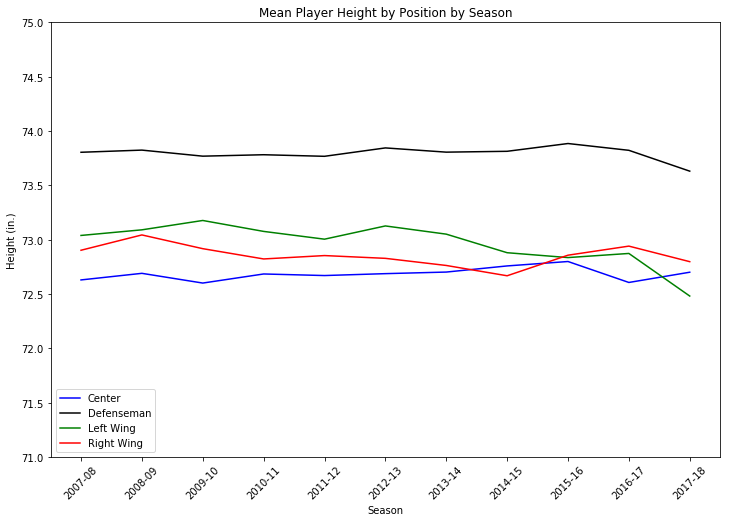

In [6]:
plt.plot(c_mean_height_by_yr, color='blue', label='Center')
plt.plot(d_mean_height_by_yr, color='black', label='Defenseman')
plt.plot(l_mean_height_by_yr, color='green', label='Left Wing')
plt.plot(r_mean_height_by_yr, color='red', label='Right Wing')
plt.title('Mean Player Height by Position by Season')
plt.ylabel('Height (in.)')
plt.xlabel('Season')
plt.ylim(71,75)
plt.xticks(np.arange(11), ('2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18'), rotation=45)
plt.legend(loc='lower left')
plt.show()

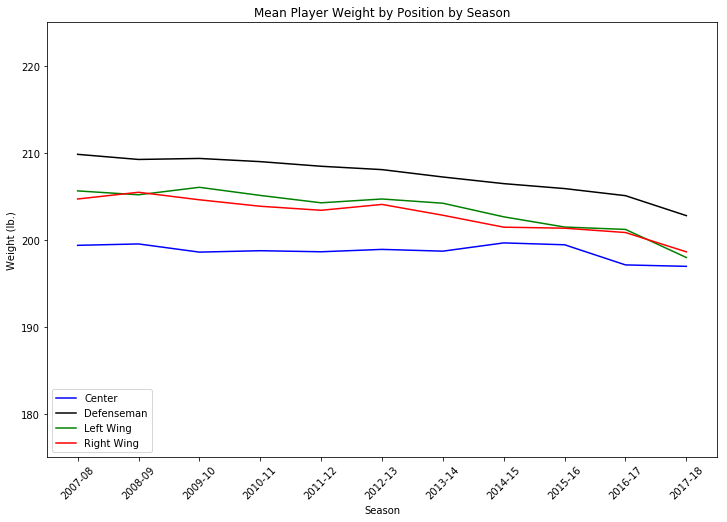

In [7]:
plt.plot(c_mean_weight_by_yr, color='blue', label='Center')
plt.plot(d_mean_weight_by_yr, color='black', label='Defenseman')
plt.plot(l_mean_weight_by_yr, color='green', label='Left Wing')
plt.plot(r_mean_weight_by_yr, color='red', label='Right Wing')
plt.title('Mean Player Weight by Position by Season')
plt.ylabel('Weight (lb.)')
plt.xlabel('Season')
plt.ylim(175,225)
plt.xticks(np.arange(11), ('2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18'), rotation=45)
plt.legend(loc='lower left')
plt.show()

In [8]:
# Setup dataframes by draft round

df_rnd1 = df[df['Draft Round'] == '1']
df_rnd2 = df[df['Draft Round'] == '2']
df_rnd3 = df[df['Draft Round'] == '3']
df_rnd4 = df[df['Draft Round'] == '4']
df_rnd5 = df[df['Draft Round'] == '5']
df_rnd6 = df[df['Draft Round'] == '6']
df_rnd7 = df[df['Draft Round'] == '7']
df_rnd8 = df[df['Draft Round'] == '8']
df_rnd9 = df[df['Draft Round'] == '9']
df_rnd_none = df[df['Draft Round'] == '-']

In [9]:
# Setup dataframes now by position within draft round

df_rnd1_c = df_rnd1[df_rnd1['Position'] == 'C']
df_rnd2_c = df_rnd2[df_rnd2['Position'] == 'C']
df_rnd3_c = df_rnd3[df_rnd3['Position'] == 'C']
df_rnd4_c = df_rnd4[df_rnd4['Position'] == 'C']
df_rnd5_c = df_rnd5[df_rnd5['Position'] == 'C']
df_rnd6_c = df_rnd6[df_rnd6['Position'] == 'C']
df_rnd7_c = df_rnd7[df_rnd7['Position'] == 'C']
df_rnd8_c = df_rnd8[df_rnd8['Position'] == 'C']
df_rnd9_c = df_rnd9[df_rnd9['Position'] == 'C']
df_rnd_none_c = df_rnd_none[df_rnd_none['Position'] == 'C']

df_rnd1_d = df_rnd1[df_rnd1['Position'] == 'D']
df_rnd2_d = df_rnd2[df_rnd2['Position'] == 'D']
df_rnd3_d = df_rnd3[df_rnd3['Position'] == 'D']
df_rnd4_d = df_rnd4[df_rnd4['Position'] == 'D']
df_rnd5_d = df_rnd5[df_rnd5['Position'] == 'D']
df_rnd6_d = df_rnd6[df_rnd6['Position'] == 'D']
df_rnd7_d = df_rnd7[df_rnd7['Position'] == 'D']
df_rnd8_d = df_rnd8[df_rnd8['Position'] == 'D']
df_rnd9_d = df_rnd9[df_rnd9['Position'] == 'D']
df_rnd_none_d = df_rnd_none[df_rnd_none['Position'] == 'D']

df_rnd1_l = df_rnd1[df_rnd1['Position'] == 'L']
df_rnd2_l = df_rnd2[df_rnd2['Position'] == 'L']
df_rnd3_l = df_rnd3[df_rnd3['Position'] == 'L']
df_rnd4_l = df_rnd4[df_rnd4['Position'] == 'L']
df_rnd5_l = df_rnd5[df_rnd5['Position'] == 'L']
df_rnd6_l = df_rnd6[df_rnd6['Position'] == 'L']
df_rnd7_l = df_rnd7[df_rnd7['Position'] == 'L']
df_rnd8_l = df_rnd8[df_rnd8['Position'] == 'L']
df_rnd9_l = df_rnd9[df_rnd9['Position'] == 'L']
df_rnd_none_l = df_rnd_none[df_rnd_none['Position'] == 'L']

df_rnd1_r = df_rnd1[df_rnd1['Position'] == 'R']
df_rnd2_r = df_rnd2[df_rnd2['Position'] == 'R']
df_rnd3_r = df_rnd3[df_rnd3['Position'] == 'R']
df_rnd4_r = df_rnd4[df_rnd4['Position'] == 'R']
df_rnd5_r = df_rnd5[df_rnd5['Position'] == 'R']
df_rnd6_r = df_rnd6[df_rnd6['Position'] == 'R']
df_rnd7_r = df_rnd7[df_rnd7['Position'] == 'R']
df_rnd8_r = df_rnd8[df_rnd8['Position'] == 'R']
df_rnd9_r = df_rnd9[df_rnd9['Position'] == 'R']
df_rnd_none_r = df_rnd_none[df_rnd_none['Position'] == 'R']

In [10]:
# Calculate mean height and weight by draft round

c_mean_height_by_rnd = np.empty(10)
c_mean_weight_by_rnd = np.empty(10)
d_mean_height_by_rnd = np.empty(10)
d_mean_weight_by_rnd = np.empty(10)
l_mean_height_by_rnd = np.empty(10)
l_mean_weight_by_rnd = np.empty(10)
r_mean_height_by_rnd = np.empty(10)
r_mean_weight_by_rnd = np.empty(10)

for i in np.arange(10):
    c_mean_height_by_rnd[i] = 0
    c_mean_weight_by_rnd[i] = 0
    d_mean_height_by_rnd[i] = 0
    d_mean_weight_by_rnd[i] = 0
    l_mean_height_by_rnd[i] = 0
    l_mean_weight_by_rnd[i] = 0
    r_mean_height_by_rnd[i] = 0
    r_mean_weight_by_rnd[i] = 0
    
c_mean_height_by_rnd[0] = np.mean(df_rnd1_c['Height (in)'])
c_mean_height_by_rnd[1] = np.mean(df_rnd2_c['Height (in)'])
c_mean_height_by_rnd[2] = np.mean(df_rnd3_c['Height (in)'])
c_mean_height_by_rnd[3] = np.mean(df_rnd4_c['Height (in)'])
c_mean_height_by_rnd[4] = np.mean(df_rnd5_c['Height (in)'])
c_mean_height_by_rnd[5] = np.mean(df_rnd6_c['Height (in)'])
c_mean_height_by_rnd[6] = np.mean(df_rnd7_c['Height (in)'])
c_mean_height_by_rnd[7] = np.mean(df_rnd8_c['Height (in)'])
c_mean_height_by_rnd[8] = np.mean(df_rnd9_c['Height (in)'])
c_mean_height_by_rnd[9] = np.mean(df_rnd_none_c['Height (in)'])

d_mean_height_by_rnd[0] = np.mean(df_rnd1_d['Height (in)'])
d_mean_height_by_rnd[1] = np.mean(df_rnd2_d['Height (in)'])
d_mean_height_by_rnd[2] = np.mean(df_rnd3_d['Height (in)'])
d_mean_height_by_rnd[3] = np.mean(df_rnd4_d['Height (in)'])
d_mean_height_by_rnd[4] = np.mean(df_rnd5_d['Height (in)'])
d_mean_height_by_rnd[5] = np.mean(df_rnd6_d['Height (in)'])
d_mean_height_by_rnd[6] = np.mean(df_rnd7_d['Height (in)'])
d_mean_height_by_rnd[7] = np.mean(df_rnd8_d['Height (in)'])
d_mean_height_by_rnd[8] = np.mean(df_rnd9_d['Height (in)'])
d_mean_height_by_rnd[9] = np.mean(df_rnd_none_d['Height (in)'])

l_mean_height_by_rnd[0] = np.mean(df_rnd1_l['Height (in)'])
l_mean_height_by_rnd[1] = np.mean(df_rnd2_l['Height (in)'])
l_mean_height_by_rnd[2] = np.mean(df_rnd3_l['Height (in)'])
l_mean_height_by_rnd[3] = np.mean(df_rnd4_l['Height (in)'])
l_mean_height_by_rnd[4] = np.mean(df_rnd5_l['Height (in)'])
l_mean_height_by_rnd[5] = np.mean(df_rnd6_l['Height (in)'])
l_mean_height_by_rnd[6] = np.mean(df_rnd7_l['Height (in)'])
l_mean_height_by_rnd[7] = np.mean(df_rnd8_l['Height (in)'])
l_mean_height_by_rnd[8] = np.mean(df_rnd9_l['Height (in)'])
l_mean_height_by_rnd[9] = np.mean(df_rnd_none_l['Height (in)'])

r_mean_height_by_rnd[0] = np.mean(df_rnd1_r['Height (in)'])
r_mean_height_by_rnd[1] = np.mean(df_rnd2_r['Height (in)'])
r_mean_height_by_rnd[2] = np.mean(df_rnd3_r['Height (in)'])
r_mean_height_by_rnd[3] = np.mean(df_rnd4_r['Height (in)'])
r_mean_height_by_rnd[4] = np.mean(df_rnd5_r['Height (in)'])
r_mean_height_by_rnd[5] = np.mean(df_rnd6_r['Height (in)'])
r_mean_height_by_rnd[6] = np.mean(df_rnd7_r['Height (in)'])
r_mean_height_by_rnd[7] = np.mean(df_rnd8_r['Height (in)'])
r_mean_height_by_rnd[8] = np.mean(df_rnd9_r['Height (in)'])
r_mean_height_by_rnd[9] = np.mean(df_rnd_none_r['Height (in)'])

c_mean_weight_by_rnd[0] = np.mean(df_rnd1_c['Weight (lbs)'])
c_mean_weight_by_rnd[1] = np.mean(df_rnd2_c['Weight (lbs)'])
c_mean_weight_by_rnd[2] = np.mean(df_rnd3_c['Weight (lbs)'])
c_mean_weight_by_rnd[3] = np.mean(df_rnd4_c['Weight (lbs)'])
c_mean_weight_by_rnd[4] = np.mean(df_rnd5_c['Weight (lbs)'])
c_mean_weight_by_rnd[5] = np.mean(df_rnd6_c['Weight (lbs)'])
c_mean_weight_by_rnd[6] = np.mean(df_rnd7_c['Weight (lbs)'])
c_mean_weight_by_rnd[7] = np.mean(df_rnd8_c['Weight (lbs)'])
c_mean_weight_by_rnd[8] = np.mean(df_rnd9_c['Weight (lbs)'])
c_mean_weight_by_rnd[9] = np.mean(df_rnd_none_c['Weight (lbs)'])

d_mean_weight_by_rnd[0] = np.mean(df_rnd1_d['Weight (lbs)'])
d_mean_weight_by_rnd[1] = np.mean(df_rnd2_d['Weight (lbs)'])
d_mean_weight_by_rnd[2] = np.mean(df_rnd3_d['Weight (lbs)'])
d_mean_weight_by_rnd[3] = np.mean(df_rnd4_d['Weight (lbs)'])
d_mean_weight_by_rnd[4] = np.mean(df_rnd5_d['Weight (lbs)'])
d_mean_weight_by_rnd[5] = np.mean(df_rnd6_d['Weight (lbs)'])
d_mean_weight_by_rnd[6] = np.mean(df_rnd7_d['Weight (lbs)'])
d_mean_weight_by_rnd[7] = np.mean(df_rnd8_d['Weight (lbs)'])
d_mean_weight_by_rnd[8] = np.mean(df_rnd9_d['Weight (lbs)'])
d_mean_weight_by_rnd[9] = np.mean(df_rnd_none_d['Weight (lbs)'])

l_mean_weight_by_rnd[0] = np.mean(df_rnd1_l['Weight (lbs)'])
l_mean_weight_by_rnd[1] = np.mean(df_rnd2_l['Weight (lbs)'])
l_mean_weight_by_rnd[2] = np.mean(df_rnd3_l['Weight (lbs)'])
l_mean_weight_by_rnd[3] = np.mean(df_rnd4_l['Weight (lbs)'])
l_mean_weight_by_rnd[4] = np.mean(df_rnd5_l['Weight (lbs)'])
l_mean_weight_by_rnd[5] = np.mean(df_rnd6_l['Weight (lbs)'])
l_mean_weight_by_rnd[6] = np.mean(df_rnd7_l['Weight (lbs)'])
l_mean_weight_by_rnd[7] = np.mean(df_rnd8_l['Weight (lbs)'])
l_mean_weight_by_rnd[8] = np.mean(df_rnd9_l['Weight (lbs)'])
l_mean_weight_by_rnd[9] = np.mean(df_rnd_none_l['Weight (lbs)'])

r_mean_weight_by_rnd[0] = np.mean(df_rnd1_r['Weight (lbs)'])
r_mean_weight_by_rnd[1] = np.mean(df_rnd2_r['Weight (lbs)'])
r_mean_weight_by_rnd[2] = np.mean(df_rnd3_r['Weight (lbs)'])
r_mean_weight_by_rnd[3] = np.mean(df_rnd4_r['Weight (lbs)'])
r_mean_weight_by_rnd[4] = np.mean(df_rnd5_r['Weight (lbs)'])
r_mean_weight_by_rnd[5] = np.mean(df_rnd6_r['Weight (lbs)'])
r_mean_weight_by_rnd[6] = np.mean(df_rnd7_r['Weight (lbs)'])
r_mean_weight_by_rnd[7] = np.mean(df_rnd8_r['Weight (lbs)'])
r_mean_weight_by_rnd[8] = np.mean(df_rnd9_r['Weight (lbs)'])
r_mean_weight_by_rnd[9] = np.mean(df_rnd_none_r['Weight (lbs)'])

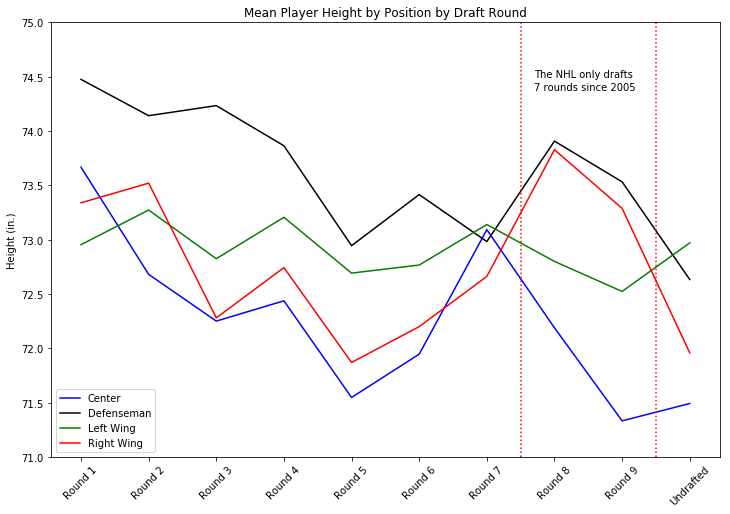

In [11]:
plt.plot(c_mean_height_by_rnd, color='blue', label='Center')
plt.plot(d_mean_height_by_rnd, color='black', label='Defenseman')
plt.plot(l_mean_height_by_rnd, color='green', label='Left Wing')
plt.plot(r_mean_height_by_rnd, color='red', label='Right Wing')
plt.title('Mean Player Height by Position by Draft Round')
plt.plot([6.5,6.5],[71,75],linestyle='dotted', color='red')
plt.plot([8.5,8.5],[71,75],linestyle='dotted', color='red')
plt.text(6.7, 74.5,'The NHL only drafts')
plt.text(6.7, 74.38,'7 rounds since 2005')
plt.ylabel('Height (in.)')
plt.ylim(71,75)
plt.xticks(np.arange(10), ('Round 1','Round 2','Round 3','Round 4','Round 5','Round 6','Round 7','Round 8','Round 9','Undrafted'), rotation=45)
plt.legend(loc='lower left')
plt.show()

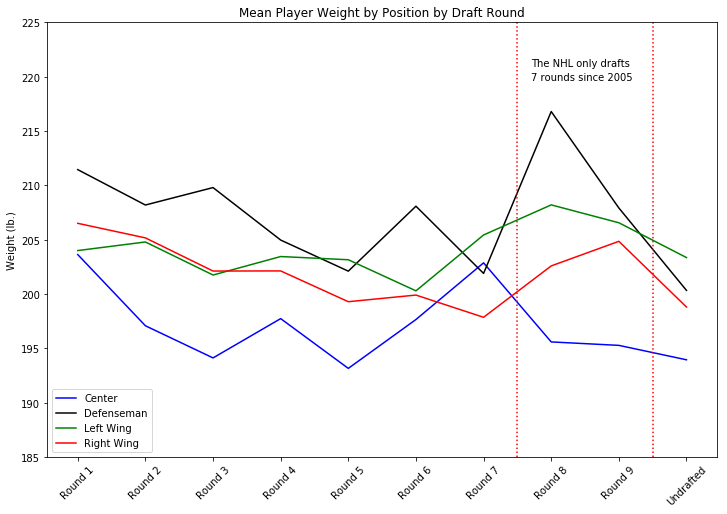

In [12]:
plt.plot(c_mean_weight_by_rnd, color='blue', label='Center')
plt.plot(d_mean_weight_by_rnd, color='black', label='Defenseman')
plt.plot(l_mean_weight_by_rnd, color='green', label='Left Wing')
plt.plot(r_mean_weight_by_rnd, color='red', label='Right Wing')
plt.title('Mean Player Weight by Position by Draft Round')
plt.plot([6.5,6.5],[185,225],linestyle='dotted', color='red')
plt.plot([8.5,8.5],[185,225],linestyle='dotted', color='red')
plt.text(6.7, 221,'The NHL only drafts')
plt.text(6.7, 219.7,'7 rounds since 2005')
plt.ylabel('Weight (lb.)')
plt.ylim(185,225)
plt.xticks(np.arange(10), ('Round 1','Round 2','Round 3','Round 4','Round 5','Round 6','Round 7','Round 8','Round 9','Undrafted'), rotation=45)
plt.legend(loc='lower left')
plt.show()

In [13]:
# Let's see which nationalities are common

print(df['Nationality'].value_counts())

CAN    5015
USA    2392
SWE     692
CZE     437
RUS     326
FIN     302
SVK     141
CHE      85
DNK      67
DEU      67
AUT      32
LVA      27
BLR      26
FRA      21
UKR      17
NOR      16
SVN      14
LTU      10
KAZ       6
BHS       3
HRV       3
NGA       2
NLD       2
GBR       2
AUS       1
Name: Nationality, dtype: int64


In [14]:
# I'm going to choose 100 as the cut-off to track individual countries

df_can = df[df['Nationality'] == 'CAN']
df_usa = df[df['Nationality'] == 'USA']
df_swe = df[df['Nationality'] == 'SWE']
df_cze = df[df['Nationality'] == 'CZE']
df_rus = df[df['Nationality'] == 'RUS']
df_fin = df[df['Nationality'] == 'FIN']
df_svk = df[df['Nationality'] == 'SVK']
df_oth = df[(df['Nationality'] != 'CAN') & (df['Nationality'] != 'USA') & (df['Nationality'] != 'RUS') & (df['Nationality'] != 'SWE') & (df['Nationality'] != 'CZE') & (df['Nationality'] != 'FIN') & (df['Nationality'] != 'SVK')]

In [15]:
# I don't want to use a player more than once here.

df_can_uni = df_can.drop_duplicates(subset='Player')
df_usa_uni = df_usa.drop_duplicates(subset='Player')
df_rus_uni = df_rus.drop_duplicates(subset='Player')
df_swe_uni = df_swe.drop_duplicates(subset='Player')
df_cze_uni = df_cze.drop_duplicates(subset='Player')
df_fin_uni = df_fin.drop_duplicates(subset='Player')
df_svk_uni = df_svk.drop_duplicates(subset='Player')
df_oth_uni = df_oth.drop_duplicates(subset='Player')

In [16]:
# Now to calculate the mean heights and weights

can_mean_height = np.mean(df_can_uni['Height (in)'])
usa_mean_height = np.mean(df_usa_uni['Height (in)'])
rus_mean_height = np.mean(df_rus_uni['Height (in)'])
swe_mean_height = np.mean(df_swe_uni['Height (in)'])
cze_mean_height = np.mean(df_cze_uni['Height (in)'])
fin_mean_height = np.mean(df_fin_uni['Height (in)'])
svk_mean_height = np.mean(df_svk_uni['Height (in)'])
oth_mean_height = np.mean(df_oth_uni['Height (in)'])

can_mean_weight = np.mean(df_can_uni['Weight (lbs)'])
usa_mean_weight = np.mean(df_usa_uni['Weight (lbs)'])
rus_mean_weight = np.mean(df_rus_uni['Weight (lbs)'])
swe_mean_weight = np.mean(df_swe_uni['Weight (lbs)'])
cze_mean_weight = np.mean(df_cze_uni['Weight (lbs)'])
fin_mean_weight = np.mean(df_fin_uni['Weight (lbs)'])
svk_mean_weight = np.mean(df_svk_uni['Weight (lbs)'])
oth_mean_weight = np.mean(df_oth_uni['Weight (lbs)'])

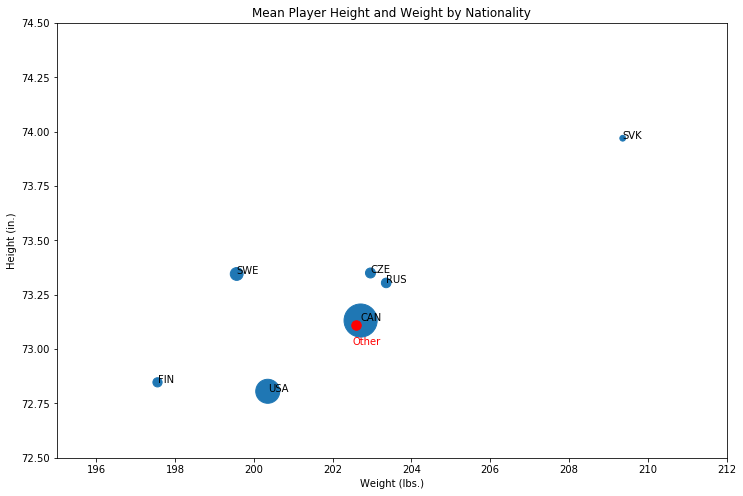

In [17]:
height_list = [can_mean_height, usa_mean_height, rus_mean_height, swe_mean_height, cze_mean_height, fin_mean_height, svk_mean_height]
weight_list = [can_mean_weight, usa_mean_weight, rus_mean_weight, swe_mean_weight, cze_mean_weight, fin_mean_weight, svk_mean_weight]
name_list = ['CAN','USA','RUS','SWE','CZE','FIN','SVK']
size_list = [(len(df_can_uni)),(len(df_usa_uni)),(len(df_rus_uni)),(len(df_swe_uni)),(len(df_cze_uni)),(len(df_fin_uni)),(len(df_svk_uni))]

fig, ax = plt.subplots()
ax.scatter(weight_list, height_list, s=size_list)
plt.title('Mean Player Height and Weight by Nationality')
plt.ylabel('Height (in.)')
plt.xlabel('Weight (lbs.)')
plt.ylim(72.5,74.5)
plt.xlim(195,212)
ax.scatter(oth_mean_weight, oth_mean_height, color='red', s=len(df_oth_uni))
ax.text(202.5,73.02,'Other', color='red')

for i, txt in enumerate(name_list):
    ax.annotate(txt, (weight_list[i], height_list[i]))
    
plt.show()

In [18]:
# I wonder why SVK is so far from the others

print(df_svk_uni)

                  Player      Team Position Date of Birth Nationality  \
47       Andrej Meszaros       OTT        D    1985-10-13         SVK   
48         Andrej Sekera       BUF        D    1986-06-08         SVK   
87         Boris Valabik       ATL        D    1986-02-14         SVK   
103      Branislav Mezei       FLA        D    1980-10-08         SVK   
104   Branko Radivojevic       MIN        R    1980-11-24         SVK   
319         Ivan Baranka       NYR        D    1985-05-19         SVK   
424        Jozef Stumpel       FLA        L    1972-07-20         SVK   
470        Ladislav Nagy       L.A        L    1979-06-01         SVK   
478    Lubomir Visnovsky       L.A        D    1976-08-11         SVK   
493         Marcel Hossa  NYR, PHX        L    1981-10-12         SVK   
497         Marek Svatos       COL        R    1982-06-17         SVK   
499       Marian Gaborik       MIN        R    1982-02-14         SVK   
500         Marian Hossa  ATL, PIT        R    1979

In [19]:
# 2 players, Zdeno Chara and Vladimir Mihalik are bigger than the rest.  Let's see where SVK lines up without those two.

df_svk_uni_adj = df_svk_uni.drop(df_svk_uni.index[[20,22]])

print(df_svk_uni_adj)

                  Player      Team Position Date of Birth Nationality  \
47       Andrej Meszaros       OTT        D    1985-10-13         SVK   
48         Andrej Sekera       BUF        D    1986-06-08         SVK   
87         Boris Valabik       ATL        D    1986-02-14         SVK   
103      Branislav Mezei       FLA        D    1980-10-08         SVK   
104   Branko Radivojevic       MIN        R    1980-11-24         SVK   
319         Ivan Baranka       NYR        D    1985-05-19         SVK   
424        Jozef Stumpel       FLA        L    1972-07-20         SVK   
470        Ladislav Nagy       L.A        L    1979-06-01         SVK   
478    Lubomir Visnovsky       L.A        D    1976-08-11         SVK   
493         Marcel Hossa  NYR, PHX        L    1981-10-12         SVK   
497         Marek Svatos       COL        R    1982-06-17         SVK   
499       Marian Gaborik       MIN        R    1982-02-14         SVK   
500         Marian Hossa  ATL, PIT        R    1979

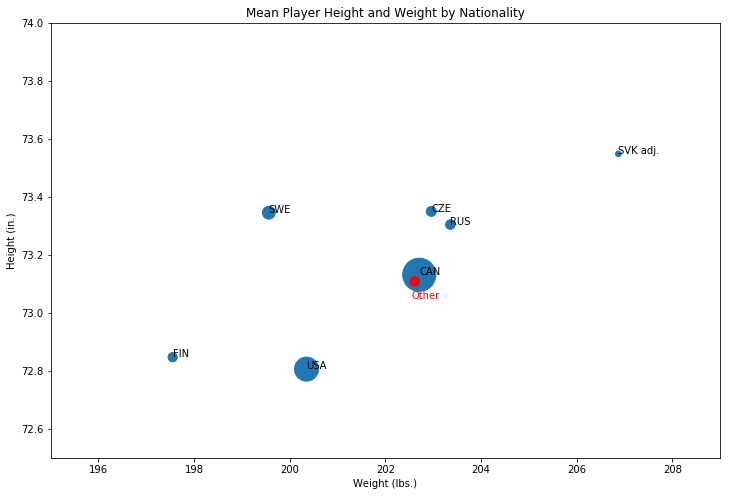

In [20]:
# Let's see the adjusted plot

svk_mean_height_adj = np.mean(df_svk_uni_adj['Height (in)'])
svk_mean_weight_adj = np.mean(df_svk_uni_adj['Weight (lbs)'])

height_list = [can_mean_height, usa_mean_height, rus_mean_height, swe_mean_height, cze_mean_height, fin_mean_height, svk_mean_height_adj]
weight_list = [can_mean_weight, usa_mean_weight, rus_mean_weight, swe_mean_weight, cze_mean_weight, fin_mean_weight, svk_mean_weight_adj]
name_list = ['CAN','USA','RUS','SWE','CZE','FIN','SVK adj.']
size_list = [(len(df_can_uni)),(len(df_usa_uni)),(len(df_rus_uni)),(len(df_swe_uni)),(len(df_cze_uni)),(len(df_fin_uni)),(len(df_svk_uni_adj))]

fig, ax = plt.subplots()
ax.scatter(weight_list, height_list, s=size_list)
plt.title('Mean Player Height and Weight by Nationality')
plt.ylabel('Height (in.)')
plt.xlabel('Weight (lbs.)')
plt.ylim(72.5,74)
plt.xlim(195,209)
ax.scatter(oth_mean_weight, oth_mean_height, color='red', s=len(df_oth_uni))
ax.text(202.55,73.05,'Other', color='red')

for i, txt in enumerate(name_list):
    ax.annotate(txt, (weight_list[i], height_list[i]))
    
plt.show()    

In [21]:
# Wow, even without those 2 giants, SVK still has the highest mean height and weight.

# Something else to look at is player nationality by season, so setup dataframes that way

df_can_0708 = df_can[df_can['Season'] == '2007-2008']
df_can_0809 = df_can[df_can['Season'] == '2008-2009']
df_can_0910 = df_can[df_can['Season'] == '2009-2010']
df_can_1011 = df_can[df_can['Season'] == '2010-2011']
df_can_1112 = df_can[df_can['Season'] == '2011-2012']
df_can_1213 = df_can[df_can['Season'] == '2012-2013']
df_can_1314 = df_can[df_can['Season'] == '2013-2014']
df_can_1415 = df_can[df_can['Season'] == '2014-2015']
df_can_1516 = df_can[df_can['Season'] == '2015-2016']
df_can_1617 = df_can[df_can['Season'] == '2016-2017']
df_can_1718 = df_can[df_can['Season'] == '2017-2018']

df_usa_0708 = df_usa[df_usa['Season'] == '2007-2008']
df_usa_0809 = df_usa[df_usa['Season'] == '2008-2009']
df_usa_0910 = df_usa[df_usa['Season'] == '2009-2010']
df_usa_1011 = df_usa[df_usa['Season'] == '2010-2011']
df_usa_1112 = df_usa[df_usa['Season'] == '2011-2012']
df_usa_1213 = df_usa[df_usa['Season'] == '2012-2013']
df_usa_1314 = df_usa[df_usa['Season'] == '2013-2014']
df_usa_1415 = df_usa[df_usa['Season'] == '2014-2015']
df_usa_1516 = df_usa[df_usa['Season'] == '2015-2016']
df_usa_1617 = df_usa[df_usa['Season'] == '2016-2017']
df_usa_1718 = df_usa[df_usa['Season'] == '2017-2018']

df_swe_0708 = df_swe[df_swe['Season'] == '2007-2008']
df_swe_0809 = df_swe[df_swe['Season'] == '2008-2009']
df_swe_0910 = df_swe[df_swe['Season'] == '2009-2010']
df_swe_1011 = df_swe[df_swe['Season'] == '2010-2011']
df_swe_1112 = df_swe[df_swe['Season'] == '2011-2012']
df_swe_1213 = df_swe[df_swe['Season'] == '2012-2013']
df_swe_1314 = df_swe[df_swe['Season'] == '2013-2014']
df_swe_1415 = df_swe[df_swe['Season'] == '2014-2015']
df_swe_1516 = df_swe[df_swe['Season'] == '2015-2016']
df_swe_1617 = df_swe[df_swe['Season'] == '2016-2017']
df_swe_1718 = df_swe[df_swe['Season'] == '2017-2018']

df_cze_0708 = df_cze[df_cze['Season'] == '2007-2008']
df_cze_0809 = df_cze[df_cze['Season'] == '2008-2009']
df_cze_0910 = df_cze[df_cze['Season'] == '2009-2010']
df_cze_1011 = df_cze[df_cze['Season'] == '2010-2011']
df_cze_1112 = df_cze[df_cze['Season'] == '2011-2012']
df_cze_1213 = df_cze[df_cze['Season'] == '2012-2013']
df_cze_1314 = df_cze[df_cze['Season'] == '2013-2014']
df_cze_1415 = df_cze[df_cze['Season'] == '2014-2015']
df_cze_1516 = df_cze[df_cze['Season'] == '2015-2016']
df_cze_1617 = df_cze[df_cze['Season'] == '2016-2017']
df_cze_1718 = df_cze[df_cze['Season'] == '2017-2018']

df_rus_0708 = df_rus[df_rus['Season'] == '2007-2008']
df_rus_0809 = df_rus[df_rus['Season'] == '2008-2009']
df_rus_0910 = df_rus[df_rus['Season'] == '2009-2010']
df_rus_1011 = df_rus[df_rus['Season'] == '2010-2011']
df_rus_1112 = df_rus[df_rus['Season'] == '2011-2012']
df_rus_1213 = df_rus[df_rus['Season'] == '2012-2013']
df_rus_1314 = df_rus[df_rus['Season'] == '2013-2014']
df_rus_1415 = df_rus[df_rus['Season'] == '2014-2015']
df_rus_1516 = df_rus[df_rus['Season'] == '2015-2016']
df_rus_1617 = df_rus[df_rus['Season'] == '2016-2017']
df_rus_1718 = df_rus[df_rus['Season'] == '2017-2018']

df_fin_0708 = df_fin[df_fin['Season'] == '2007-2008']
df_fin_0809 = df_fin[df_fin['Season'] == '2008-2009']
df_fin_0910 = df_fin[df_fin['Season'] == '2009-2010']
df_fin_1011 = df_fin[df_fin['Season'] == '2010-2011']
df_fin_1112 = df_fin[df_fin['Season'] == '2011-2012']
df_fin_1213 = df_fin[df_fin['Season'] == '2012-2013']
df_fin_1314 = df_fin[df_fin['Season'] == '2013-2014']
df_fin_1415 = df_fin[df_fin['Season'] == '2014-2015']
df_fin_1516 = df_fin[df_fin['Season'] == '2015-2016']
df_fin_1617 = df_fin[df_fin['Season'] == '2016-2017']
df_fin_1718 = df_fin[df_fin['Season'] == '2017-2018']

df_svk_0708 = df_svk[df_svk['Season'] == '2007-2008']
df_svk_0809 = df_svk[df_svk['Season'] == '2008-2009']
df_svk_0910 = df_svk[df_svk['Season'] == '2009-2010']
df_svk_1011 = df_svk[df_svk['Season'] == '2010-2011']
df_svk_1112 = df_svk[df_svk['Season'] == '2011-2012']
df_svk_1213 = df_svk[df_svk['Season'] == '2012-2013']
df_svk_1314 = df_svk[df_svk['Season'] == '2013-2014']
df_svk_1415 = df_svk[df_svk['Season'] == '2014-2015']
df_svk_1516 = df_svk[df_svk['Season'] == '2015-2016']
df_svk_1617 = df_svk[df_svk['Season'] == '2016-2017']
df_svk_1718 = df_svk[df_svk['Season'] == '2017-2018']

df_oth_0708 = df_oth[df_oth['Season'] == '2007-2008']
df_oth_0809 = df_oth[df_oth['Season'] == '2008-2009']
df_oth_0910 = df_oth[df_oth['Season'] == '2009-2010']
df_oth_1011 = df_oth[df_oth['Season'] == '2010-2011']
df_oth_1112 = df_oth[df_oth['Season'] == '2011-2012']
df_oth_1213 = df_oth[df_oth['Season'] == '2012-2013']
df_oth_1314 = df_oth[df_oth['Season'] == '2013-2014']
df_oth_1415 = df_oth[df_oth['Season'] == '2014-2015']
df_oth_1516 = df_oth[df_oth['Season'] == '2015-2016']
df_oth_1617 = df_oth[df_oth['Season'] == '2016-2017']
df_oth_1718 = df_oth[df_oth['Season'] == '2017-2018']

In [22]:
num_can = np.empty(11)
num_usa = np.empty(11)
num_swe = np.empty(11)
num_cze = np.empty(11)
num_rus = np.empty(11)
num_fin = np.empty(11)
num_svk = np.empty(11)
num_oth = np.empty(11)

for i in np.arange(11):
    num_can[i] = 0
    num_usa[i] = 0
    num_swe[i] = 0
    num_cze[i] = 0
    num_rus[i] = 0
    num_fin[i] = 0
    num_svk[i] = 0
    num_oth[i] = 0
    
num_can[0] = len(df_can_0708)
num_can[1] = len(df_can_0809)
num_can[2] = len(df_can_0910)
num_can[3] = len(df_can_1011)
num_can[4] = len(df_can_1112)
num_can[5] = len(df_can_1213)
num_can[6] = len(df_can_1314)
num_can[7] = len(df_can_1415)
num_can[8] = len(df_can_1516)
num_can[9] = len(df_can_1617)
num_can[10] = len(df_can_1718)

num_usa[0] = len(df_usa_0708)
num_usa[1] = len(df_usa_0809)
num_usa[2] = len(df_usa_0910)
num_usa[3] = len(df_usa_1011)
num_usa[4] = len(df_usa_1112)
num_usa[5] = len(df_usa_1213)
num_usa[6] = len(df_usa_1314)
num_usa[7] = len(df_usa_1415)
num_usa[8] = len(df_usa_1516)
num_usa[9] = len(df_usa_1617)
num_usa[10] = len(df_usa_1718)

num_swe[0] = len(df_swe_0708)
num_swe[1] = len(df_swe_0809)
num_swe[2] = len(df_swe_0910)
num_swe[3] = len(df_swe_1011)
num_swe[4] = len(df_swe_1112)
num_swe[5] = len(df_swe_1213)
num_swe[6] = len(df_swe_1314)
num_swe[7] = len(df_swe_1415)
num_swe[8] = len(df_swe_1516)
num_swe[9] = len(df_swe_1617)
num_swe[10] = len(df_swe_1718)

num_cze[0] = len(df_cze_0708)
num_cze[1] = len(df_cze_0809)
num_cze[2] = len(df_cze_0910)
num_cze[3] = len(df_cze_1011)
num_cze[4] = len(df_cze_1112)
num_cze[5] = len(df_cze_1213)
num_cze[6] = len(df_cze_1314)
num_cze[7] = len(df_cze_1415)
num_cze[8] = len(df_cze_1516)
num_cze[9] = len(df_cze_1617)
num_cze[10] = len(df_cze_1718)

num_rus[0] = len(df_rus_0708)
num_rus[1] = len(df_rus_0809)
num_rus[2] = len(df_rus_0910)
num_rus[3] = len(df_rus_1011)
num_rus[4] = len(df_rus_1112)
num_rus[5] = len(df_rus_1213)
num_rus[6] = len(df_rus_1314)
num_rus[7] = len(df_rus_1415)
num_rus[8] = len(df_rus_1516)
num_rus[9] = len(df_rus_1617)
num_rus[10] = len(df_rus_1718)

num_fin[0] = len(df_fin_0708)
num_fin[1] = len(df_fin_0809)
num_fin[2] = len(df_fin_0910)
num_fin[3] = len(df_fin_1011)
num_fin[4] = len(df_fin_1112)
num_fin[5] = len(df_fin_1213)
num_fin[6] = len(df_fin_1314)
num_fin[7] = len(df_fin_1415)
num_fin[8] = len(df_fin_1516)
num_fin[9] = len(df_fin_1617)
num_fin[10] = len(df_fin_1718)

num_svk[0] = len(df_svk_0708)
num_svk[1] = len(df_svk_0809)
num_svk[2] = len(df_svk_0910)
num_svk[3] = len(df_svk_1011)
num_svk[4] = len(df_svk_1112)
num_svk[5] = len(df_svk_1213)
num_svk[6] = len(df_svk_1314)
num_svk[7] = len(df_svk_1415)
num_svk[8] = len(df_svk_1516)
num_svk[9] = len(df_svk_1617)
num_svk[10] = len(df_svk_1718)

num_oth[0] = len(df_oth_0708)
num_oth[1] = len(df_oth_0809)
num_oth[2] = len(df_oth_0910)
num_oth[3] = len(df_oth_1011)
num_oth[4] = len(df_oth_1112)
num_oth[5] = len(df_oth_1213)
num_oth[6] = len(df_oth_1314)
num_oth[7] = len(df_oth_1415)
num_oth[8] = len(df_oth_1516)
num_oth[9] = len(df_oth_1617)
num_oth[10] = len(df_oth_1718)

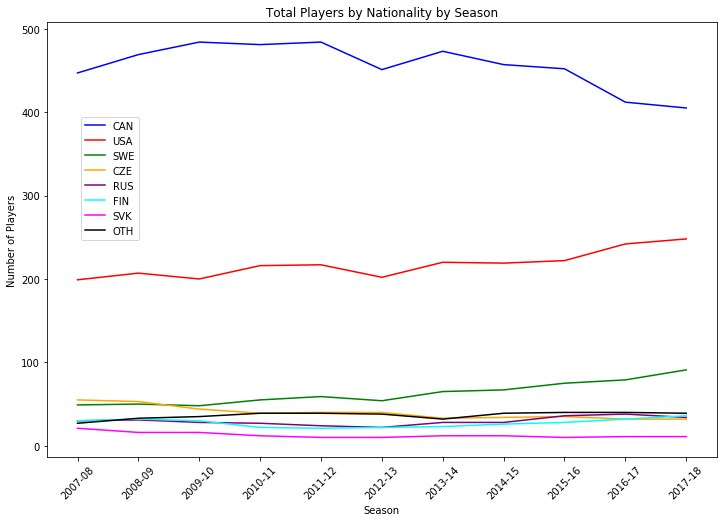

In [23]:
plt.plot(num_can, color='blue', label='CAN')
plt.plot(num_usa, color='red', label='USA')
plt.plot(num_swe, color='green', label='SWE')
plt.plot(num_cze, color='orange', label='CZE')
plt.plot(num_rus, color='purple', label='RUS')
plt.plot(num_fin, color='cyan', label='FIN')
plt.plot(num_svk, color='magenta', label='SVK')
plt.plot(num_oth, color='black', label='OTH')
plt.title('Total Players by Nationality by Season')
plt.ylabel('Number of Players')
plt.xlabel('Season')
plt.xticks(np.arange(11), ('2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18'), rotation=45)
plt.legend(loc=(0.05,0.5))
plt.show()

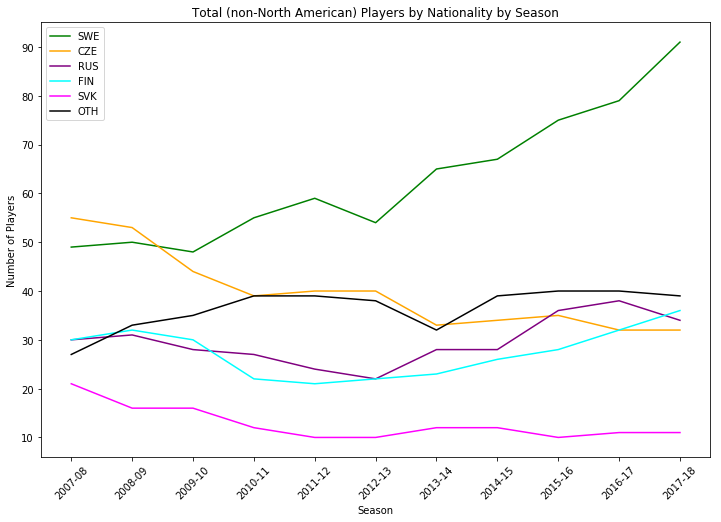

In [24]:
# So, the number of Canadian players is generally decreasing and the number of US players is generally increasing

# Let's focus on the non-North American players

plt.plot(num_swe, color='green', label='SWE')
plt.plot(num_cze, color='orange', label='CZE')
plt.plot(num_rus, color='purple', label='RUS')
plt.plot(num_fin, color='cyan', label='FIN')
plt.plot(num_svk, color='magenta', label='SVK')
plt.plot(num_oth, color='black', label='OTH')
plt.title('Total (non-North American) Players by Nationality by Season')
plt.ylabel('Number of Players')
plt.xlabel('Season')
plt.xticks(np.arange(11), ('2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18'), rotation=45)
plt.legend(loc='upper left')
plt.show()

In [25]:
# Interesting.  The number of Swedish players has almost doubled in 11 seasons, Czechs have dropped by about one third, 
# Slovakians have dropped by about one half, and Russians and Finnish dipped and then rose again, while players from all
# other countries have risen by about one half with a dip in 2013-14

# Time for some feature scatter plots.  First I need to remember which features I'm looking for.

import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 0 to 9705
Data columns (total 38 columns):
Player                9706 non-null object
Team                  9706 non-null object
Position              9706 non-null object
Date of Birth         9706 non-null object
Nationality           9706 non-null object
Height (in)           9706 non-null int64
Weight (lbs)          9706 non-null int64
Draft Year            9706 non-null object
Draft Round           9706 non-null object
GP                    9706 non-null int64
TOI                   9706 non-null float64
CF%                   9706 non-null float64
FF%                   9706 non-null float64
SF%                   9706 non-null float64
GF%                   9706 non-null float64
SCF%                  9706 non-null float64
HDCF%                 9706 non-null float64
HDGF%                 9706 non-null float64
PDO                   9706 non-null float64
Off Zone Faceoff %    9704 non-null float64
Def Zone Faceoff %    9704

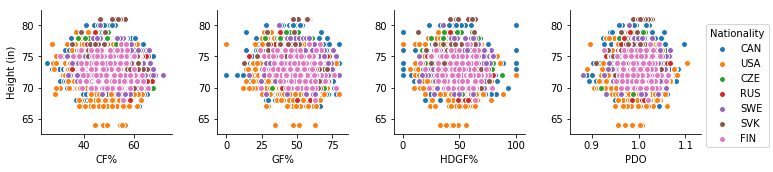

In [26]:
# First, I'll modify the dataframe to only keep players from countries with large player counts and to only keep players
# who played more than a quarter of a given season, to concentrate the analysis on the most contributory players

df_adj = df[(df['Nationality'] == 'CAN') | (df['Nationality'] == 'USA') | (df['Nationality'] == 'RUS') | (df['Nationality'] == 'SWE') | (df['Nationality'] == 'CZE') | (df['Nationality'] == 'FIN') | (df['Nationality'] == 'SVK')]
df_adj = df_adj[df_adj['GP'] > 20]

sns.pairplot(data = df_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'], hue='Nationality')
    
plt.show()

In [27]:
# That's still too hard to read.  I'll plot each country individually and compare the plots that way and still keep only
# players who played more than a quarter of the season

df_can_adj = df_can[df_can['GP'] > 20]
df_usa_adj = df_usa[df_usa['GP'] > 20]
df_rus_adj = df_rus[df_rus['GP'] > 20]
df_cze_adj = df_cze[df_cze['GP'] > 20]
df_swe_adj = df_swe[df_swe['GP'] > 20]
df_fin_adj = df_fin[df_fin['GP'] > 20]
df_svk_adj = df_svk[df_svk['GP'] > 20]

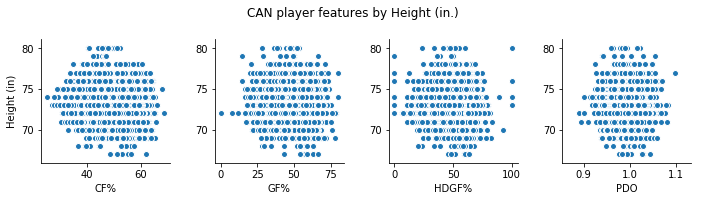

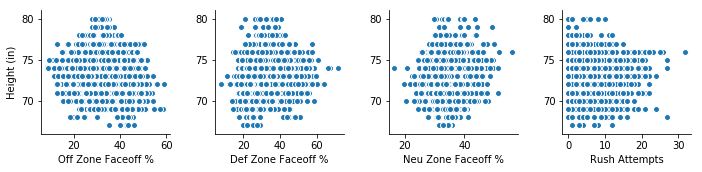

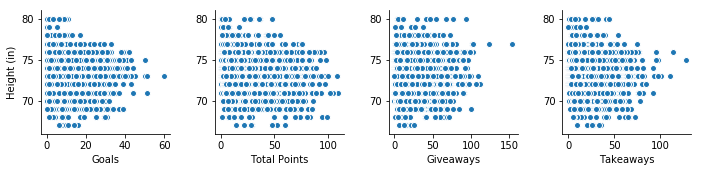

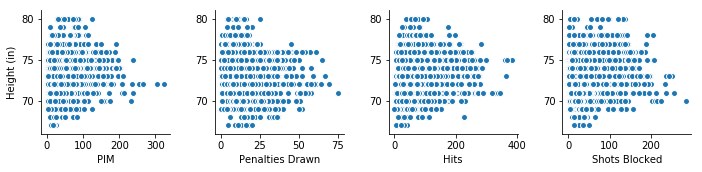

In [28]:
sns.pairplot(data = df_can_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('CAN player features by Height (in.)', y=1.1)
sns.pairplot(data = df_can_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_can_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_can_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

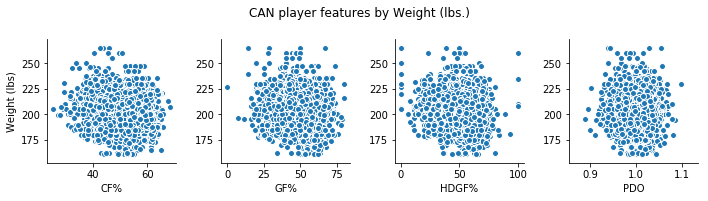

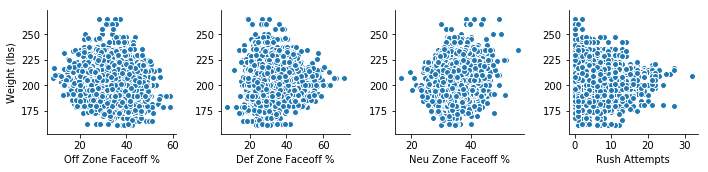

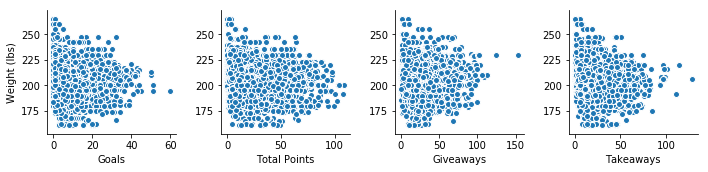

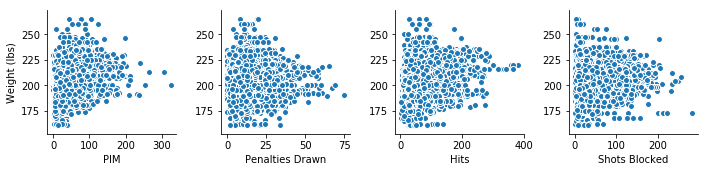

In [29]:
sns.pairplot(data = df_can_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('CAN player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_can_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_can_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_can_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

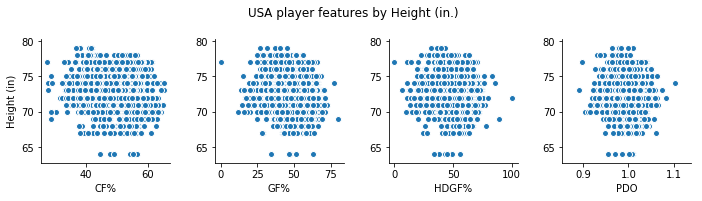

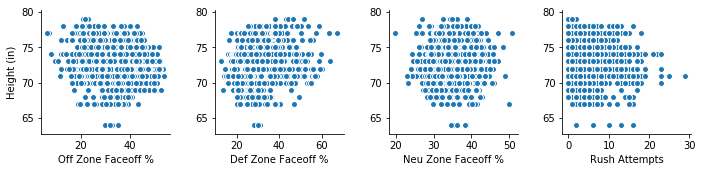

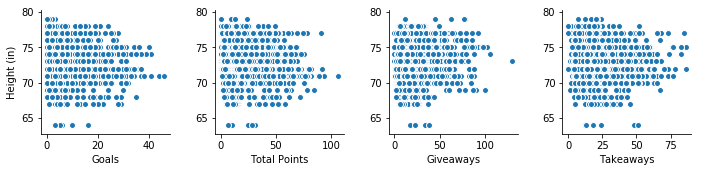

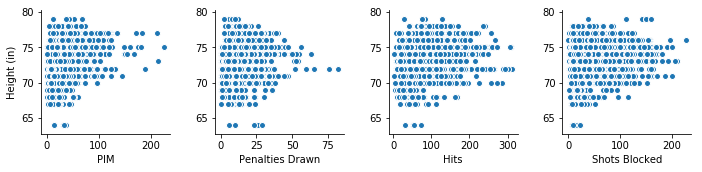

In [30]:
sns.pairplot(data = df_usa_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('USA player features by Height (in.)', y=1.1)
sns.pairplot(data = df_usa_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_usa_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_usa_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

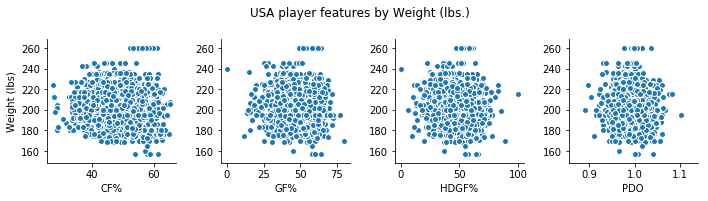

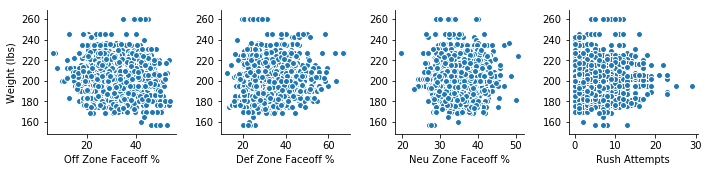

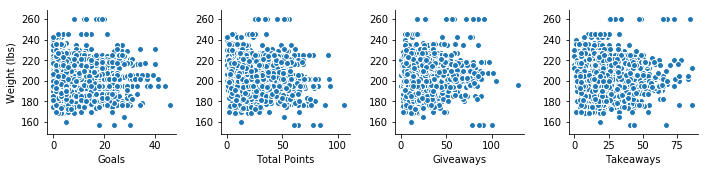

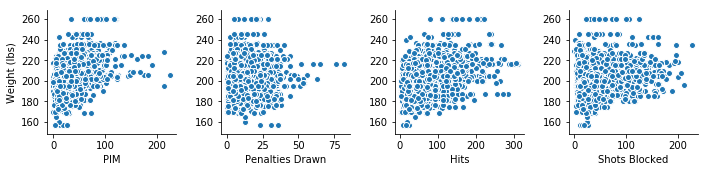

In [31]:
sns.pairplot(data = df_usa_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('USA player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_usa_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_usa_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_usa_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

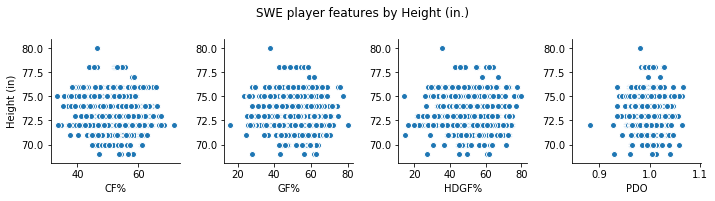

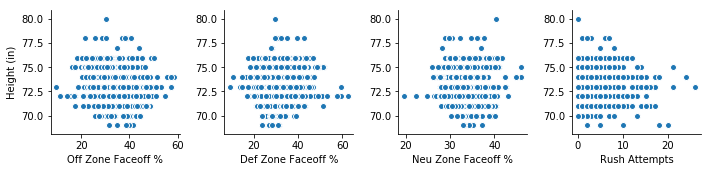

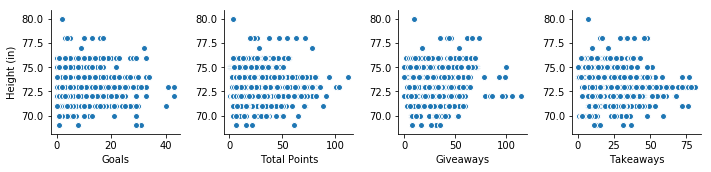

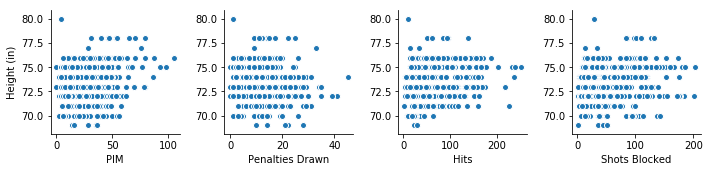

In [32]:
sns.pairplot(data = df_swe_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('SWE player features by Height (in.)', y=1.1)
sns.pairplot(data = df_swe_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_swe_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_swe_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

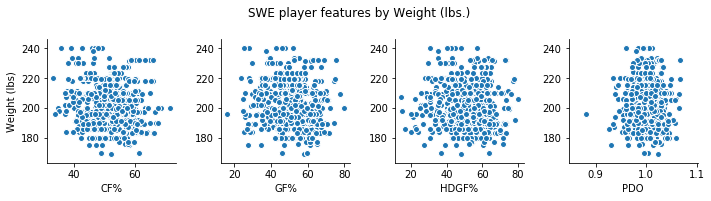

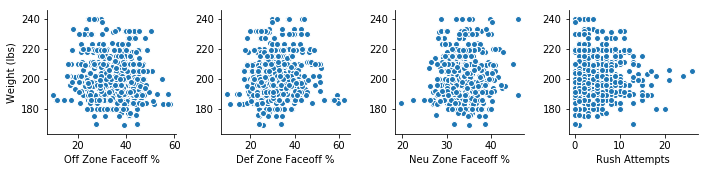

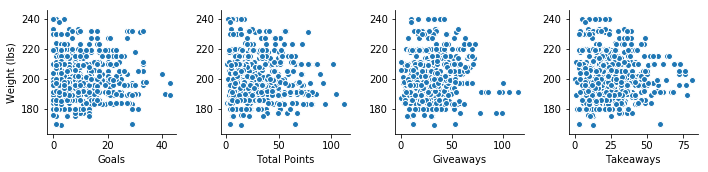

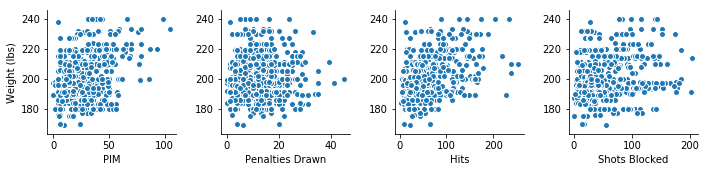

In [33]:
sns.pairplot(data = df_swe_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('SWE player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_swe_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_swe_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_swe_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

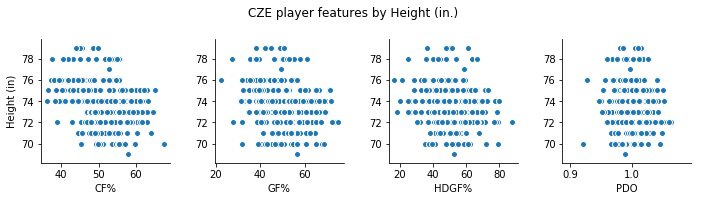

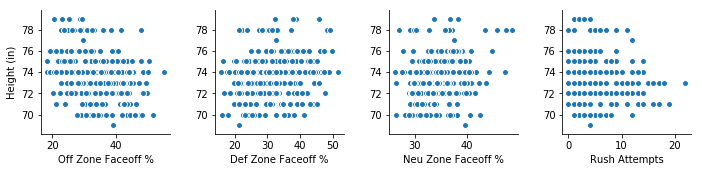

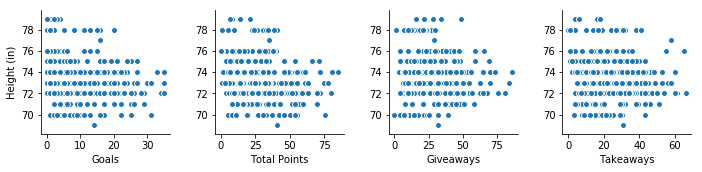

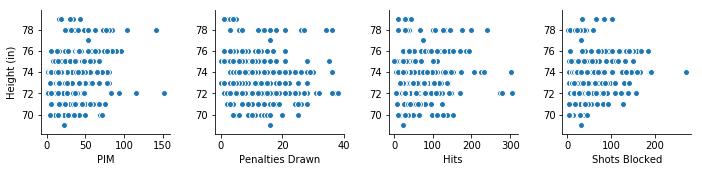

In [34]:
sns.pairplot(data = df_cze_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('CZE player features by Height (in.)', y=1.1)
sns.pairplot(data = df_cze_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_cze_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_cze_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

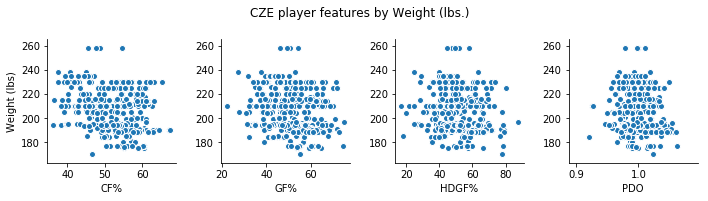

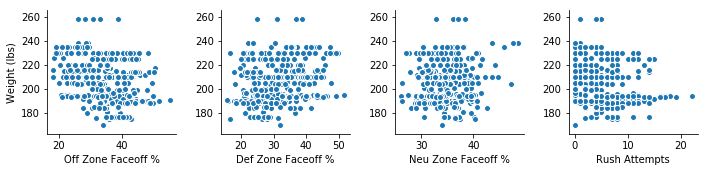

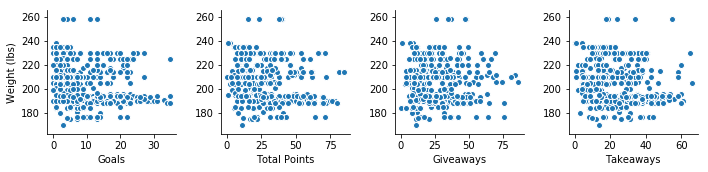

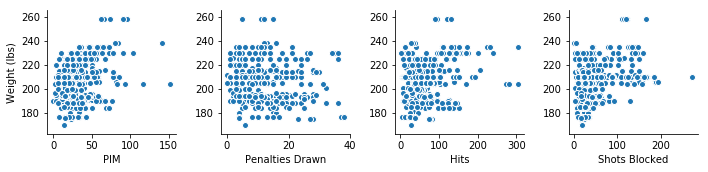

In [35]:
sns.pairplot(data = df_cze_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('CZE player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_cze_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_cze_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_cze_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

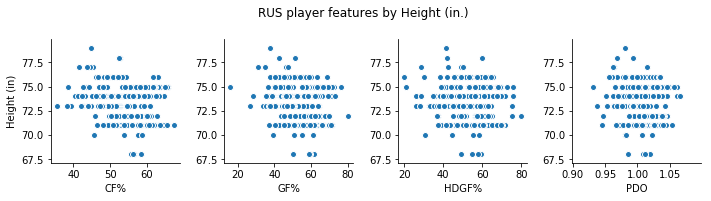

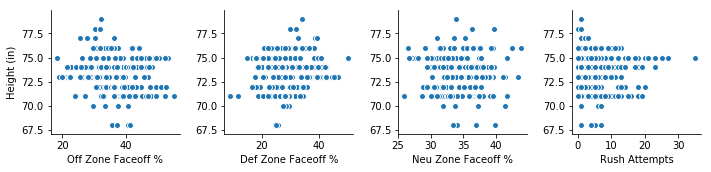

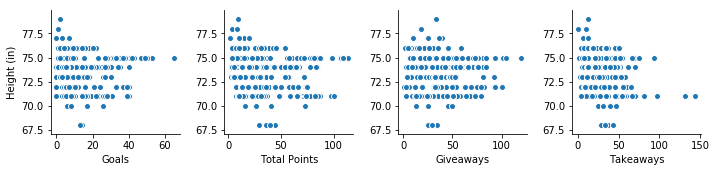

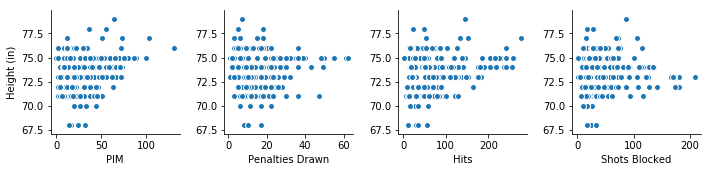

In [36]:
sns.pairplot(data = df_rus_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('RUS player features by Height (in.)', y=1.1)
sns.pairplot(data = df_rus_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_rus_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_rus_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

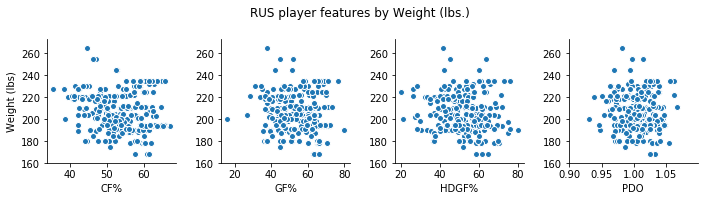

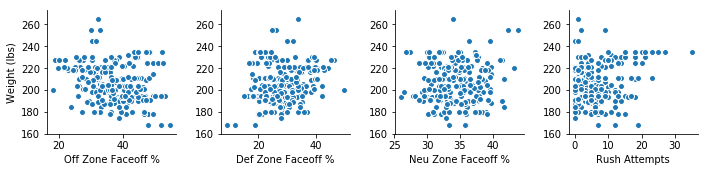

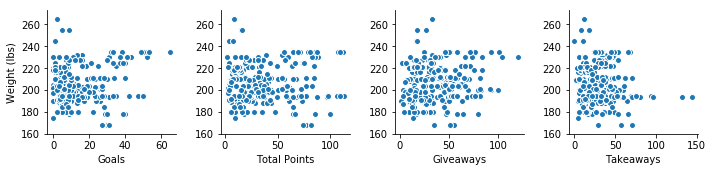

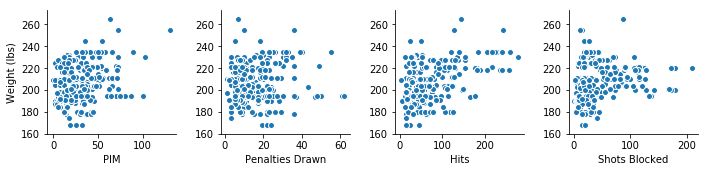

In [37]:
sns.pairplot(data = df_rus_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('RUS player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_rus_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_rus_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_rus_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

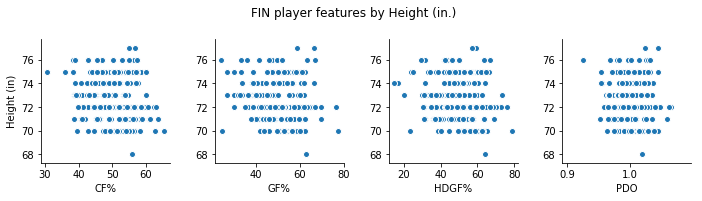

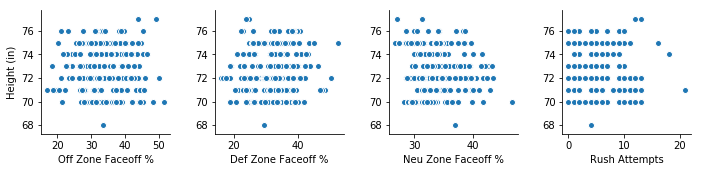

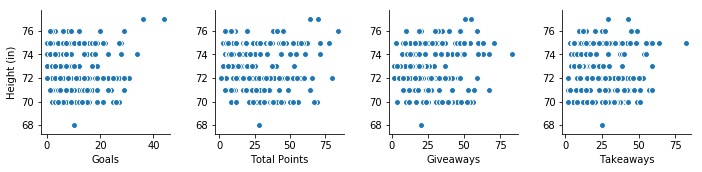

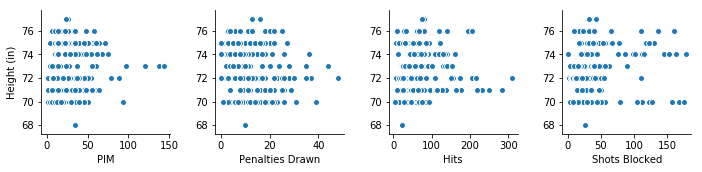

In [38]:
sns.pairplot(data = df_fin_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('FIN player features by Height (in.)', y=1.1)
sns.pairplot(data = df_fin_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_fin_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_fin_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

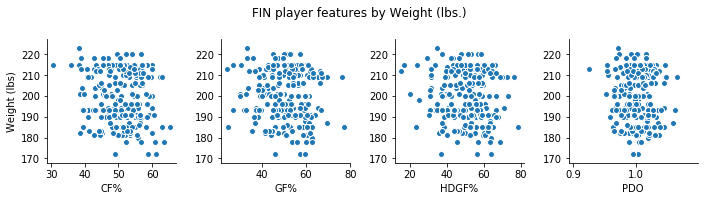

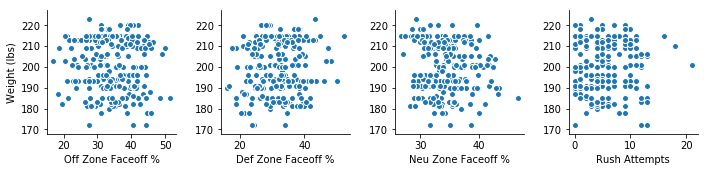

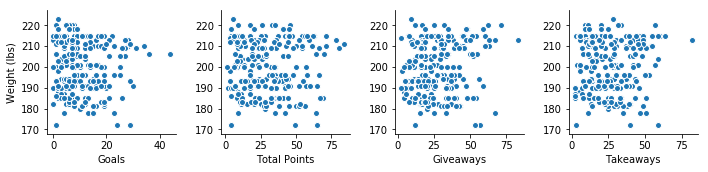

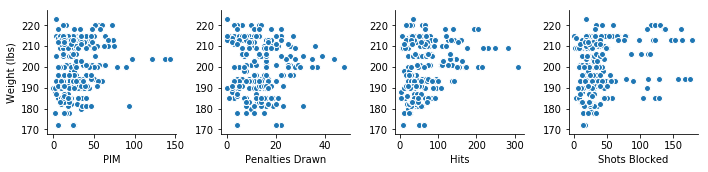

In [39]:
sns.pairplot(data = df_fin_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('FIN player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_fin_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_fin_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_fin_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

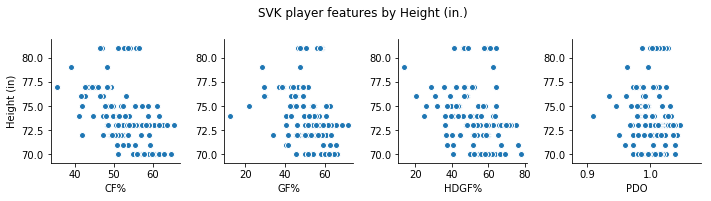

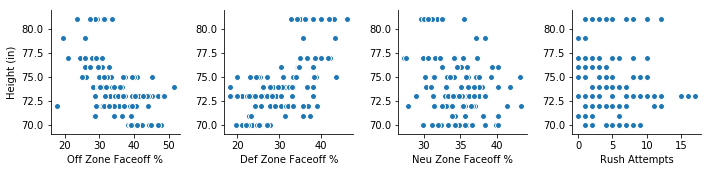

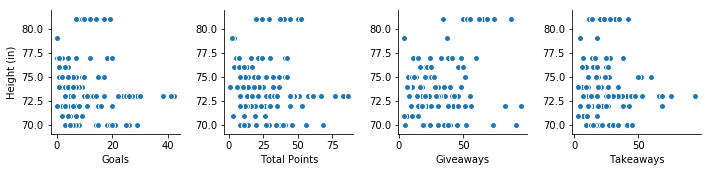

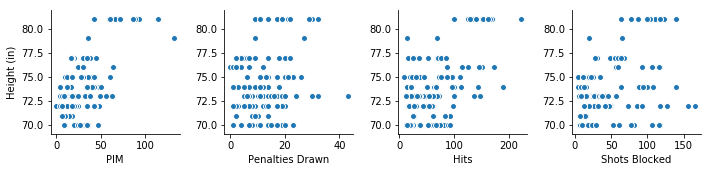

In [40]:
sns.pairplot(data = df_svk_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Height (in)'])
plt.suptitle('SVK player features by Height (in.)', y=1.1)
sns.pairplot(data = df_svk_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Height (in)'])
sns.pairplot(data = df_svk_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Height (in)'])
sns.pairplot(data = df_svk_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Height (in)'])
    
plt.show()

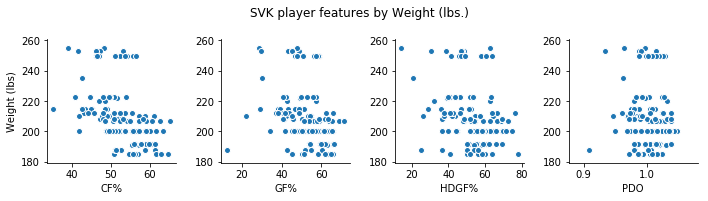

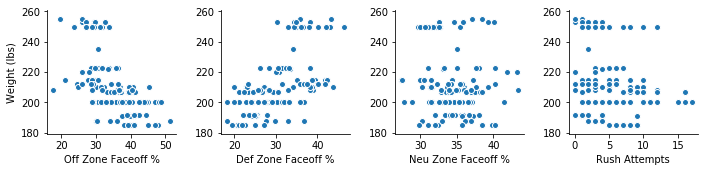

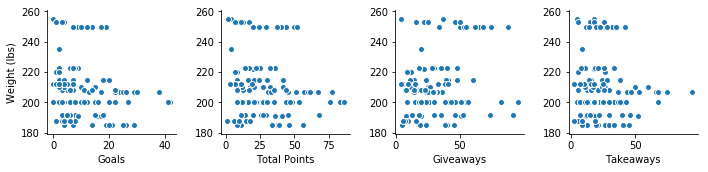

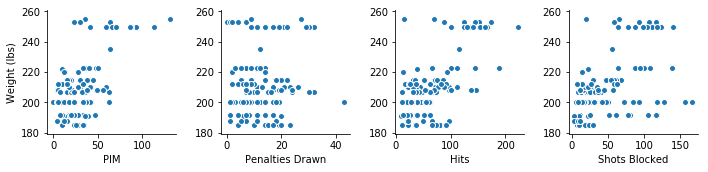

In [41]:
sns.pairplot(data = df_svk_adj, x_vars=['CF%','GF%','HDGF%','PDO'], y_vars=['Weight (lbs)'])
plt.suptitle('SVK player features by Weight (lbs.)', y=1.1)
sns.pairplot(data = df_svk_adj, x_vars=['Off Zone Faceoff %','Def Zone Faceoff %','Neu Zone Faceoff %','Rush Attempts'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_svk_adj, x_vars=['Goals','Total Points','Giveaways','Takeaways'], y_vars=['Weight (lbs)'])
sns.pairplot(data = df_svk_adj, x_vars=['PIM','Penalties Drawn','Hits','Shots Blocked'], y_vars=['Weight (lbs)'])
    
plt.show()

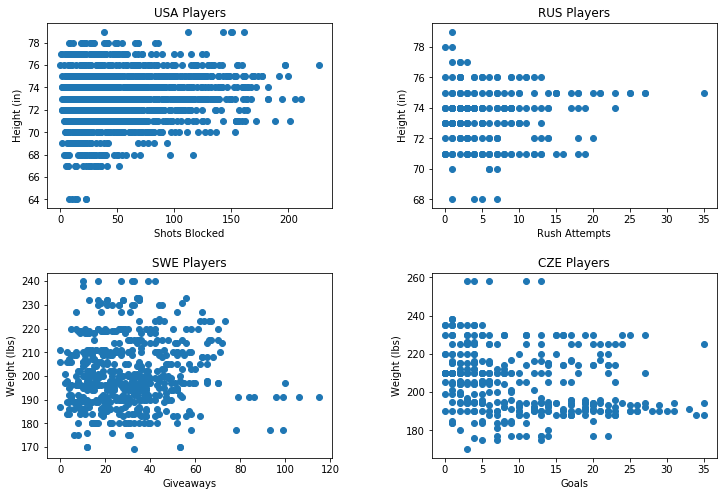

In [42]:
# In none of those plots is there an obvious correlation or trend.  I'll have to see if I can find some statistical
# evidence during inference.
# I'll make one final 2x2 plot to show some interesting finds for the final report.

plt.subplots_adjust(hspace=0.35,wspace=0.35)
plt.subplot(2,2,1)
plt.scatter(df_usa_adj['Shots Blocked'],df_usa_adj['Height (in)'])
plt.title('USA Players')
plt.xlabel('Shots Blocked')
plt.ylabel('Height (in)')
plt.subplot(2,2,2)
plt.scatter(df_rus_adj['Rush Attempts'],df_rus_adj['Height (in)'])
plt.title('RUS Players')
plt.xlabel('Rush Attempts')
plt.ylabel('Height (in)')
plt.subplot(2,2,3)
plt.scatter(df_swe_adj['Giveaways'],df_swe_adj['Weight (lbs)'])
plt.title('SWE Players')
plt.xlabel('Giveaways')
plt.ylabel('Weight (lbs)')
plt.subplot(2,2,4)
plt.scatter(df_cze_adj['Goals'],df_cze_adj['Weight (lbs)'])
plt.title('CZE Players')
plt.xlabel('Goals')
plt.ylabel('Weight (lbs)')

plt.show()

I think these 4 plots are interesting.  In the top left, it appears to show a lot of shot blocking for US players with a peak around 75 inches.  Since the mean US player height is around 73 inches, I found it interesting that, compared to players from other countries, tall US players seem to block more shots.  Similarly, in the top right, Russian players seem to have a peak in rush attempts around also 75 inches, which is much taller than other countries' players.  In the bottom left, this plot really needs the corresponding plots from the other countries to see the difference, but it appears Swedish players have a lower rate of giveaways in general.  The bulk of the data shows less than 50 giveaways, but other countries' players often show up to 100 giveaways.  In the bottom right, what stands out to me is the large amount of data showing Czech players around 190 pounds scoring many goals.  The mean Czech player weight is around 203 pounds, so it seems unusual to see such a concentration.

In [43]:
# I guess the last thing to visualize is player age, so let's set each player's age for each season.
# Originally, the data contained "age", but it was each player's age in the current season only, and this way I can
# compare player performance with the age they were in the appropriate season.  For this project, I'll define age
# as the season minus the player's birth year for convenience

df_age_adj = df[df['GP'] > 20]

age_list = np.empty(len(df_age_adj))

for i in range(len(age_list)):
    age_list[i] = 0
    
for i in range(len(df_age_adj)):
    age = (int(df_age_adj[i:(i+1)]['Season'].str[0:4]) - int(df_age_adj[i:(i+1)]['Date of Birth'].str[0:4]))
    age_list[i] = age
    
df_age_adj['Age'] = age_list
df_age_adj.head()

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Player,Team,Position,Date of Birth,Nationality,Height (in),Weight (lbs),Draft Year,Draft Round,GP,...,PIM,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,Season,Age
0,Aaron Downey,DET,R,1974-08-27,CAN,73,215,-,-,56,...,116,21,4,3,79,48,6,-,2007-2008,33.0
1,Aaron Johnson,NYI,D,1983-04-30,CAN,73,204,2001,3,30,...,30,4,16,18,41,39,28,-,2007-2008,24.0
2,Aaron Miller,VAN,D,1971-08-11,USA,75,210,1989,5,57,...,32,4,29,15,37,74,80,-,2007-2008,36.0
4,Aaron Voros,MIN,L,1981-07-02,CAN,74,210,2001,8,55,...,141,32,10,8,96,67,5,20,2007-2008,26.0
5,Aaron Ward,BOS,D,1973-01-17,CAN,74,209,1991,1,65,...,54,11,18,5,143,81,119,-,2007-2008,34.0


In [44]:
# Looks good.  Let's get started.  First, what's the age range and how many player records are in each age?

df_age_adj['Age'].value_counts().sort_index()

18.0     23
19.0    114
20.0    215
21.0    341
22.0    479
23.0    615
24.0    649
25.0    634
26.0    603
27.0    565
28.0    515
29.0    446
30.0    416
31.0    357
32.0    315
33.0    257
34.0    205
35.0    187
36.0    138
37.0    101
38.0     58
39.0     32
40.0     16
41.0      8
42.0      4
43.0      2
44.0      1
45.0      2
46.0      1
Name: Age, dtype: int64

In [45]:
# I think I'll cut-off at 100 again, that will include 19 year olds but no one over 37.  Setup some dataframe by age.

df_19 = df_age_adj[df_age_adj['Age'] == 19]
df_20 = df_age_adj[df_age_adj['Age'] == 20]
df_21 = df_age_adj[df_age_adj['Age'] == 21]
df_22 = df_age_adj[df_age_adj['Age'] == 22]
df_23 = df_age_adj[df_age_adj['Age'] == 23]
df_24 = df_age_adj[df_age_adj['Age'] == 24]
df_25 = df_age_adj[df_age_adj['Age'] == 25]
df_26 = df_age_adj[df_age_adj['Age'] == 26]
df_27 = df_age_adj[df_age_adj['Age'] == 27]
df_28 = df_age_adj[df_age_adj['Age'] == 28]
df_29 = df_age_adj[df_age_adj['Age'] == 29]
df_30 = df_age_adj[df_age_adj['Age'] == 30]
df_31 = df_age_adj[df_age_adj['Age'] == 31]
df_32 = df_age_adj[df_age_adj['Age'] == 32]
df_33 = df_age_adj[df_age_adj['Age'] == 33]
df_34 = df_age_adj[df_age_adj['Age'] == 34]
df_35 = df_age_adj[df_age_adj['Age'] == 35]
df_36 = df_age_adj[df_age_adj['Age'] == 36]
df_37 = df_age_adj[df_age_adj['Age'] == 37]

df_19.head()

,Player,Team,Position,Date of Birth,Nationality,Height (in),Weight (lbs),Draft Year,Draft Round,GP,...,PIM,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,Season,Age
229,David Perron,STL,L,1988-05-28,CAN,72,200,2007,1,62,...,38,28,12,24,65,72,7,35.71,2007-2008,19.0
279,Erik Johnson,STL,D,1988-03-21,USA,76,225,2006,1,69,...,28,8,37,27,87,101,64,0,2007-2008,19.0
326,James Sheppard,MIN,C,1988-04-25,CAN,73,215,2006,1,78,...,29,14,20,28,40,39,22,41.53,2007-2008,19.0
383,Jiri Tlusty,TOR,L,1988-03-16,CZE,72,205,2006,1,58,...,14,9,8,17,39,102,16,50,2007-2008,19.0
412,Jonathan Toews,CHI,C,1988-04-29,CAN,74,201,2006,1,64,...,44,28,8,29,27,77,13,53.24,2007-2008,19.0


In [46]:
# Now, calculate some means to make some graphs from

df_age_cf = np.empty(19)
df_age_gf = np.empty(19)
df_age_hdgf = np.empty(19)
df_age_pdo = np.empty(19)
df_age_offz = np.empty(19)
df_age_defz = np.empty(19)
df_age_neuz = np.empty(19)
df_age_rush = np.empty(19)
df_age_goal = np.empty(19)
df_age_pnt = np.empty(19)
df_age_give = np.empty(19)
df_age_take = np.empty(19)
df_age_pim = np.empty(19)
df_age_pend = np.empty(19)
df_age_hit = np.empty(19)
df_age_sb = np.empty(19)

for i in np.arange(19):
    df_age_cf[i] = 0
    df_age_gf[i] = 0
    df_age_hdgf[i] = 0
    df_age_pdo[i] = 0
    df_age_offz[i] = 0
    df_age_defz[i] = 0
    df_age_neuz[i] = 0
    df_age_rush[i] = 0
    df_age_goal[i] = 0
    df_age_pnt[i] = 0
    df_age_give[i] = 0
    df_age_take[i] = 0
    df_age_pim[i] = 0
    df_age_pend[i] = 0
    df_age_hit[i] = 0
    df_age_sb[i] = 0
    
df_age_cf[0] = np.mean(df_19['CF%'])
df_age_cf[1] = np.mean(df_20['CF%'])
df_age_cf[2] = np.mean(df_21['CF%'])
df_age_cf[3] = np.mean(df_22['CF%'])
df_age_cf[4] = np.mean(df_23['CF%'])
df_age_cf[5] = np.mean(df_24['CF%'])
df_age_cf[6] = np.mean(df_25['CF%'])
df_age_cf[7] = np.mean(df_26['CF%'])
df_age_cf[8] = np.mean(df_27['CF%'])
df_age_cf[9] = np.mean(df_28['CF%'])
df_age_cf[10] = np.mean(df_29['CF%'])
df_age_cf[11] = np.mean(df_30['CF%'])
df_age_cf[12] = np.mean(df_31['CF%'])
df_age_cf[13] = np.mean(df_32['CF%'])
df_age_cf[14] = np.mean(df_33['CF%'])
df_age_cf[15] = np.mean(df_34['CF%'])
df_age_cf[16] = np.mean(df_35['CF%'])
df_age_cf[17] = np.mean(df_36['CF%'])
df_age_cf[18] = np.mean(df_37['CF%'])

df_age_gf[0] = np.mean(df_19['GF%'])
df_age_gf[1] = np.mean(df_20['GF%'])
df_age_gf[2] = np.mean(df_21['GF%'])
df_age_gf[3] = np.mean(df_22['GF%'])
df_age_gf[4] = np.mean(df_23['GF%'])
df_age_gf[5] = np.mean(df_24['GF%'])
df_age_gf[6] = np.mean(df_25['GF%'])
df_age_gf[7] = np.mean(df_26['GF%'])
df_age_gf[8] = np.mean(df_27['GF%'])
df_age_gf[9] = np.mean(df_28['GF%'])
df_age_gf[10] = np.mean(df_29['GF%'])
df_age_gf[11] = np.mean(df_30['GF%'])
df_age_gf[12] = np.mean(df_31['GF%'])
df_age_gf[13] = np.mean(df_32['GF%'])
df_age_gf[14] = np.mean(df_33['GF%'])
df_age_gf[15] = np.mean(df_34['GF%'])
df_age_gf[16] = np.mean(df_35['GF%'])
df_age_gf[17] = np.mean(df_36['GF%'])
df_age_gf[18] = np.mean(df_37['GF%'])

df_age_hdgf[0] = np.mean(df_19['HDGF%'])
df_age_hdgf[1] = np.mean(df_20['HDGF%'])
df_age_hdgf[2] = np.mean(df_21['HDGF%'])
df_age_hdgf[3] = np.mean(df_22['HDGF%'])
df_age_hdgf[4] = np.mean(df_23['HDGF%'])
df_age_hdgf[5] = np.mean(df_24['HDGF%'])
df_age_hdgf[6] = np.mean(df_25['HDGF%'])
df_age_hdgf[7] = np.mean(df_26['HDGF%'])
df_age_hdgf[8] = np.mean(df_27['HDGF%'])
df_age_hdgf[9] = np.mean(df_28['HDGF%'])
df_age_hdgf[10] = np.mean(df_29['HDGF%'])
df_age_hdgf[11] = np.mean(df_30['HDGF%'])
df_age_hdgf[12] = np.mean(df_31['HDGF%'])
df_age_hdgf[13] = np.mean(df_32['HDGF%'])
df_age_hdgf[14] = np.mean(df_33['HDGF%'])
df_age_hdgf[15] = np.mean(df_34['HDGF%'])
df_age_hdgf[16] = np.mean(df_35['HDGF%'])
df_age_hdgf[17] = np.mean(df_36['HDGF%'])
df_age_hdgf[18] = np.mean(df_37['HDGF%'])

df_age_pdo[0] = np.mean(df_19['PDO'])
df_age_pdo[1] = np.mean(df_20['PDO'])
df_age_pdo[2] = np.mean(df_21['PDO'])
df_age_pdo[3] = np.mean(df_22['PDO'])
df_age_pdo[4] = np.mean(df_23['PDO'])
df_age_pdo[5] = np.mean(df_24['PDO'])
df_age_pdo[6] = np.mean(df_25['PDO'])
df_age_pdo[7] = np.mean(df_26['PDO'])
df_age_pdo[8] = np.mean(df_27['PDO'])
df_age_pdo[9] = np.mean(df_28['PDO'])
df_age_pdo[10] = np.mean(df_29['PDO'])
df_age_pdo[11] = np.mean(df_30['PDO'])
df_age_pdo[12] = np.mean(df_31['PDO'])
df_age_pdo[13] = np.mean(df_32['PDO'])
df_age_pdo[14] = np.mean(df_33['PDO'])
df_age_pdo[15] = np.mean(df_34['PDO'])
df_age_pdo[16] = np.mean(df_35['PDO'])
df_age_pdo[17] = np.mean(df_36['PDO'])
df_age_pdo[18] = np.mean(df_37['PDO'])

df_age_offz[0] = np.mean(df_19['Off Zone Faceoff %'])
df_age_offz[1] = np.mean(df_20['Off Zone Faceoff %'])
df_age_offz[2] = np.mean(df_21['Off Zone Faceoff %'])
df_age_offz[3] = np.mean(df_22['Off Zone Faceoff %'])
df_age_offz[4] = np.mean(df_23['Off Zone Faceoff %'])
df_age_offz[5] = np.mean(df_24['Off Zone Faceoff %'])
df_age_offz[6] = np.mean(df_25['Off Zone Faceoff %'])
df_age_offz[7] = np.mean(df_26['Off Zone Faceoff %'])
df_age_offz[8] = np.mean(df_27['Off Zone Faceoff %'])
df_age_offz[9] = np.mean(df_28['Off Zone Faceoff %'])
df_age_offz[10] = np.mean(df_29['Off Zone Faceoff %'])
df_age_offz[11] = np.mean(df_30['Off Zone Faceoff %'])
df_age_offz[12] = np.mean(df_31['Off Zone Faceoff %'])
df_age_offz[13] = np.mean(df_32['Off Zone Faceoff %'])
df_age_offz[14] = np.mean(df_33['Off Zone Faceoff %'])
df_age_offz[15] = np.mean(df_34['Off Zone Faceoff %'])
df_age_offz[16] = np.mean(df_35['Off Zone Faceoff %'])
df_age_offz[17] = np.mean(df_36['Off Zone Faceoff %'])
df_age_offz[18] = np.mean(df_37['Off Zone Faceoff %'])

df_age_defz[0] = np.mean(df_19['Def Zone Faceoff %'])
df_age_defz[1] = np.mean(df_20['Def Zone Faceoff %'])
df_age_defz[2] = np.mean(df_21['Def Zone Faceoff %'])
df_age_defz[3] = np.mean(df_22['Def Zone Faceoff %'])
df_age_defz[4] = np.mean(df_23['Def Zone Faceoff %'])
df_age_defz[5] = np.mean(df_24['Def Zone Faceoff %'])
df_age_defz[6] = np.mean(df_25['Def Zone Faceoff %'])
df_age_defz[7] = np.mean(df_26['Def Zone Faceoff %'])
df_age_defz[8] = np.mean(df_27['Def Zone Faceoff %'])
df_age_defz[9] = np.mean(df_28['Def Zone Faceoff %'])
df_age_defz[10] = np.mean(df_29['Def Zone Faceoff %'])
df_age_defz[11] = np.mean(df_30['Def Zone Faceoff %'])
df_age_defz[12] = np.mean(df_31['Def Zone Faceoff %'])
df_age_defz[13] = np.mean(df_32['Def Zone Faceoff %'])
df_age_defz[14] = np.mean(df_33['Def Zone Faceoff %'])
df_age_defz[15] = np.mean(df_34['Def Zone Faceoff %'])
df_age_defz[16] = np.mean(df_35['Def Zone Faceoff %'])
df_age_defz[17] = np.mean(df_36['Def Zone Faceoff %'])
df_age_defz[18] = np.mean(df_37['Def Zone Faceoff %'])

df_age_neuz[0] = np.mean(df_19['Neu Zone Faceoff %'])
df_age_neuz[1] = np.mean(df_20['Neu Zone Faceoff %'])
df_age_neuz[2] = np.mean(df_21['Neu Zone Faceoff %'])
df_age_neuz[3] = np.mean(df_22['Neu Zone Faceoff %'])
df_age_neuz[4] = np.mean(df_23['Neu Zone Faceoff %'])
df_age_neuz[5] = np.mean(df_24['Neu Zone Faceoff %'])
df_age_neuz[6] = np.mean(df_25['Neu Zone Faceoff %'])
df_age_neuz[7] = np.mean(df_26['Neu Zone Faceoff %'])
df_age_neuz[8] = np.mean(df_27['Neu Zone Faceoff %'])
df_age_neuz[9] = np.mean(df_28['Neu Zone Faceoff %'])
df_age_neuz[10] = np.mean(df_29['Neu Zone Faceoff %'])
df_age_neuz[11] = np.mean(df_30['Neu Zone Faceoff %'])
df_age_neuz[12] = np.mean(df_31['Neu Zone Faceoff %'])
df_age_neuz[13] = np.mean(df_32['Neu Zone Faceoff %'])
df_age_neuz[14] = np.mean(df_33['Neu Zone Faceoff %'])
df_age_neuz[15] = np.mean(df_34['Neu Zone Faceoff %'])
df_age_neuz[16] = np.mean(df_35['Neu Zone Faceoff %'])
df_age_neuz[17] = np.mean(df_36['Neu Zone Faceoff %'])
df_age_neuz[18] = np.mean(df_37['Neu Zone Faceoff %'])

df_age_rush[0] = np.mean(df_19['Rush Attempts'])
df_age_rush[1] = np.mean(df_20['Rush Attempts'])
df_age_rush[2] = np.mean(df_21['Rush Attempts'])
df_age_rush[3] = np.mean(df_22['Rush Attempts'])
df_age_rush[4] = np.mean(df_23['Rush Attempts'])
df_age_rush[5] = np.mean(df_24['Rush Attempts'])
df_age_rush[6] = np.mean(df_25['Rush Attempts'])
df_age_rush[7] = np.mean(df_26['Rush Attempts'])
df_age_rush[8] = np.mean(df_27['Rush Attempts'])
df_age_rush[9] = np.mean(df_28['Rush Attempts'])
df_age_rush[10] = np.mean(df_29['Rush Attempts'])
df_age_rush[11] = np.mean(df_30['Rush Attempts'])
df_age_rush[12] = np.mean(df_31['Rush Attempts'])
df_age_rush[13] = np.mean(df_32['Rush Attempts'])
df_age_rush[14] = np.mean(df_33['Rush Attempts'])
df_age_rush[15] = np.mean(df_34['Rush Attempts'])
df_age_rush[16] = np.mean(df_35['Rush Attempts'])
df_age_rush[17] = np.mean(df_36['Rush Attempts'])
df_age_rush[18] = np.mean(df_37['Rush Attempts'])

df_age_goal[0] = np.mean(df_19['Goals'])
df_age_goal[1] = np.mean(df_20['Goals'])
df_age_goal[2] = np.mean(df_21['Goals'])
df_age_goal[3] = np.mean(df_22['Goals'])
df_age_goal[4] = np.mean(df_23['Goals'])
df_age_goal[5] = np.mean(df_24['Goals'])
df_age_goal[6] = np.mean(df_25['Goals'])
df_age_goal[7] = np.mean(df_26['Goals'])
df_age_goal[8] = np.mean(df_27['Goals'])
df_age_goal[9] = np.mean(df_28['Goals'])
df_age_goal[10] = np.mean(df_29['Goals'])
df_age_goal[11] = np.mean(df_30['Goals'])
df_age_goal[12] = np.mean(df_31['Goals'])
df_age_goal[13] = np.mean(df_32['Goals'])
df_age_goal[14] = np.mean(df_33['Goals'])
df_age_goal[15] = np.mean(df_34['Goals'])
df_age_goal[16] = np.mean(df_35['Goals'])
df_age_goal[17] = np.mean(df_36['Goals'])
df_age_goal[18] = np.mean(df_37['Goals'])

df_age_pnt[0] = np.mean(df_19['Total Points'])
df_age_pnt[1] = np.mean(df_20['Total Points'])
df_age_pnt[2] = np.mean(df_21['Total Points'])
df_age_pnt[3] = np.mean(df_22['Total Points'])
df_age_pnt[4] = np.mean(df_23['Total Points'])
df_age_pnt[5] = np.mean(df_24['Total Points'])
df_age_pnt[6] = np.mean(df_25['Total Points'])
df_age_pnt[7] = np.mean(df_26['Total Points'])
df_age_pnt[8] = np.mean(df_27['Total Points'])
df_age_pnt[9] = np.mean(df_28['Total Points'])
df_age_pnt[10] = np.mean(df_29['Total Points'])
df_age_pnt[11] = np.mean(df_30['Total Points'])
df_age_pnt[12] = np.mean(df_31['Total Points'])
df_age_pnt[13] = np.mean(df_32['Total Points'])
df_age_pnt[14] = np.mean(df_33['Total Points'])
df_age_pnt[15] = np.mean(df_34['Total Points'])
df_age_pnt[16] = np.mean(df_35['Total Points'])
df_age_pnt[17] = np.mean(df_36['Total Points'])
df_age_pnt[18] = np.mean(df_37['Total Points'])

df_age_give[0] = np.mean(df_19['Giveaways'])
df_age_give[1] = np.mean(df_20['Giveaways'])
df_age_give[2] = np.mean(df_21['Giveaways'])
df_age_give[3] = np.mean(df_22['Giveaways'])
df_age_give[4] = np.mean(df_23['Giveaways'])
df_age_give[5] = np.mean(df_24['Giveaways'])
df_age_give[6] = np.mean(df_25['Giveaways'])
df_age_give[7] = np.mean(df_26['Giveaways'])
df_age_give[8] = np.mean(df_27['Giveaways'])
df_age_give[9] = np.mean(df_28['Giveaways'])
df_age_give[10] = np.mean(df_29['Giveaways'])
df_age_give[11] = np.mean(df_30['Giveaways'])
df_age_give[12] = np.mean(df_31['Giveaways'])
df_age_give[13] = np.mean(df_32['Giveaways'])
df_age_give[14] = np.mean(df_33['Giveaways'])
df_age_give[15] = np.mean(df_34['Giveaways'])
df_age_give[16] = np.mean(df_35['Giveaways'])
df_age_give[17] = np.mean(df_36['Giveaways'])
df_age_give[18] = np.mean(df_37['Giveaways'])

df_age_take[0] = np.mean(df_19['Takeaways'])
df_age_take[1] = np.mean(df_20['Takeaways'])
df_age_take[2] = np.mean(df_21['Takeaways'])
df_age_take[3] = np.mean(df_22['Takeaways'])
df_age_take[4] = np.mean(df_23['Takeaways'])
df_age_take[5] = np.mean(df_24['Takeaways'])
df_age_take[6] = np.mean(df_25['Takeaways'])
df_age_take[7] = np.mean(df_26['Takeaways'])
df_age_take[8] = np.mean(df_27['Takeaways'])
df_age_take[9] = np.mean(df_28['Takeaways'])
df_age_take[10] = np.mean(df_29['Takeaways'])
df_age_take[11] = np.mean(df_30['Takeaways'])
df_age_take[12] = np.mean(df_31['Takeaways'])
df_age_take[13] = np.mean(df_32['Takeaways'])
df_age_take[14] = np.mean(df_33['Takeaways'])
df_age_take[15] = np.mean(df_34['Takeaways'])
df_age_take[16] = np.mean(df_35['Takeaways'])
df_age_take[17] = np.mean(df_36['Takeaways'])
df_age_take[18] = np.mean(df_37['Takeaways'])

df_age_pim[0] = np.mean(df_19['PIM'])
df_age_pim[1] = np.mean(df_20['PIM'])
df_age_pim[2] = np.mean(df_21['PIM'])
df_age_pim[3] = np.mean(df_22['PIM'])
df_age_pim[4] = np.mean(df_23['PIM'])
df_age_pim[5] = np.mean(df_24['PIM'])
df_age_pim[6] = np.mean(df_25['PIM'])
df_age_pim[7] = np.mean(df_26['PIM'])
df_age_pim[8] = np.mean(df_27['PIM'])
df_age_pim[9] = np.mean(df_28['PIM'])
df_age_pim[10] = np.mean(df_29['PIM'])
df_age_pim[11] = np.mean(df_30['PIM'])
df_age_pim[12] = np.mean(df_31['PIM'])
df_age_pim[13] = np.mean(df_32['PIM'])
df_age_pim[14] = np.mean(df_33['PIM'])
df_age_pim[15] = np.mean(df_34['PIM'])
df_age_pim[16] = np.mean(df_35['PIM'])
df_age_pim[17] = np.mean(df_36['PIM'])
df_age_pim[18] = np.mean(df_37['PIM'])

df_age_pend[0] = np.mean(df_19['Penalties Drawn'])
df_age_pend[1] = np.mean(df_20['Penalties Drawn'])
df_age_pend[2] = np.mean(df_21['Penalties Drawn'])
df_age_pend[3] = np.mean(df_22['Penalties Drawn'])
df_age_pend[4] = np.mean(df_23['Penalties Drawn'])
df_age_pend[5] = np.mean(df_24['Penalties Drawn'])
df_age_pend[6] = np.mean(df_25['Penalties Drawn'])
df_age_pend[7] = np.mean(df_26['Penalties Drawn'])
df_age_pend[8] = np.mean(df_27['Penalties Drawn'])
df_age_pend[9] = np.mean(df_28['Penalties Drawn'])
df_age_pend[10] = np.mean(df_29['Penalties Drawn'])
df_age_pend[11] = np.mean(df_30['Penalties Drawn'])
df_age_pend[12] = np.mean(df_31['Penalties Drawn'])
df_age_pend[13] = np.mean(df_32['Penalties Drawn'])
df_age_pend[14] = np.mean(df_33['Penalties Drawn'])
df_age_pend[15] = np.mean(df_34['Penalties Drawn'])
df_age_pend[16] = np.mean(df_35['Penalties Drawn'])
df_age_pend[17] = np.mean(df_36['Penalties Drawn'])
df_age_pend[18] = np.mean(df_37['Penalties Drawn'])

df_age_hit[0] = np.mean(df_19['Hits'])
df_age_hit[1] = np.mean(df_20['Hits'])
df_age_hit[2] = np.mean(df_21['Hits'])
df_age_hit[3] = np.mean(df_22['Hits'])
df_age_hit[4] = np.mean(df_23['Hits'])
df_age_hit[5] = np.mean(df_24['Hits'])
df_age_hit[6] = np.mean(df_25['Hits'])
df_age_hit[7] = np.mean(df_26['Hits'])
df_age_hit[8] = np.mean(df_27['Hits'])
df_age_hit[9] = np.mean(df_28['Hits'])
df_age_hit[10] = np.mean(df_29['Hits'])
df_age_hit[11] = np.mean(df_30['Hits'])
df_age_hit[12] = np.mean(df_31['Hits'])
df_age_hit[13] = np.mean(df_32['Hits'])
df_age_hit[14] = np.mean(df_33['Hits'])
df_age_hit[15] = np.mean(df_34['Hits'])
df_age_hit[16] = np.mean(df_35['Hits'])
df_age_hit[17] = np.mean(df_36['Hits'])
df_age_hit[18] = np.mean(df_37['Hits'])

df_age_sb[0] = np.mean(df_19['Shots Blocked'])
df_age_sb[1] = np.mean(df_20['Shots Blocked'])
df_age_sb[2] = np.mean(df_21['Shots Blocked'])
df_age_sb[3] = np.mean(df_22['Shots Blocked'])
df_age_sb[4] = np.mean(df_23['Shots Blocked'])
df_age_sb[5] = np.mean(df_24['Shots Blocked'])
df_age_sb[6] = np.mean(df_25['Shots Blocked'])
df_age_sb[7] = np.mean(df_26['Shots Blocked'])
df_age_sb[8] = np.mean(df_27['Shots Blocked'])
df_age_sb[9] = np.mean(df_28['Shots Blocked'])
df_age_sb[10] = np.mean(df_29['Shots Blocked'])
df_age_sb[11] = np.mean(df_30['Shots Blocked'])
df_age_sb[12] = np.mean(df_31['Shots Blocked'])
df_age_sb[13] = np.mean(df_32['Shots Blocked'])
df_age_sb[14] = np.mean(df_33['Shots Blocked'])
df_age_sb[15] = np.mean(df_34['Shots Blocked'])
df_age_sb[16] = np.mean(df_35['Shots Blocked'])
df_age_sb[17] = np.mean(df_36['Shots Blocked'])
df_age_sb[18] = np.mean(df_37['Shots Blocked'])

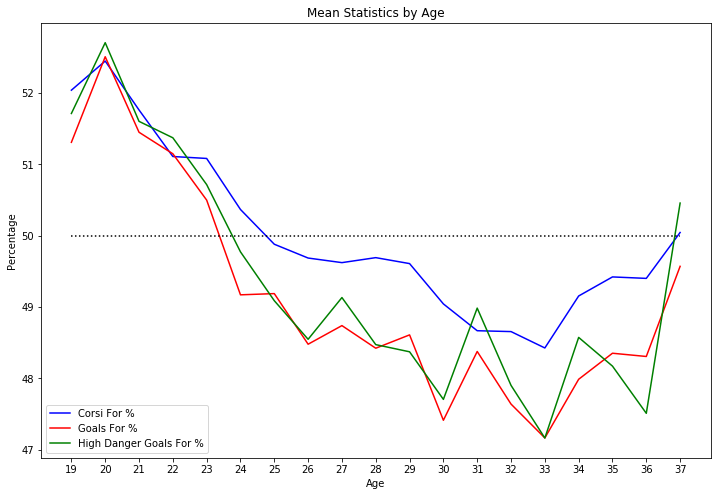

In [47]:
# I tried to plot related statistics together, but sometimes settled for stats with similar ranges

plt.plot(df_age_cf, color='blue', label='Corsi For %')
plt.plot(df_age_gf, color='red', label='Goals For %')
plt.plot(df_age_hdgf, color='green', label='High Danger Goals For %')
plt.plot([0,18],[50,50],linestyle='dotted', color='black')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='lower left')
plt.show()

The dotted line represents a player's puck possession or relative scoring being the same for his team and against his team.  Interesting that, according to this, a player's puck possession and relative scoring are higher before their mid 20's, and don't reach that level again until their late 30's.

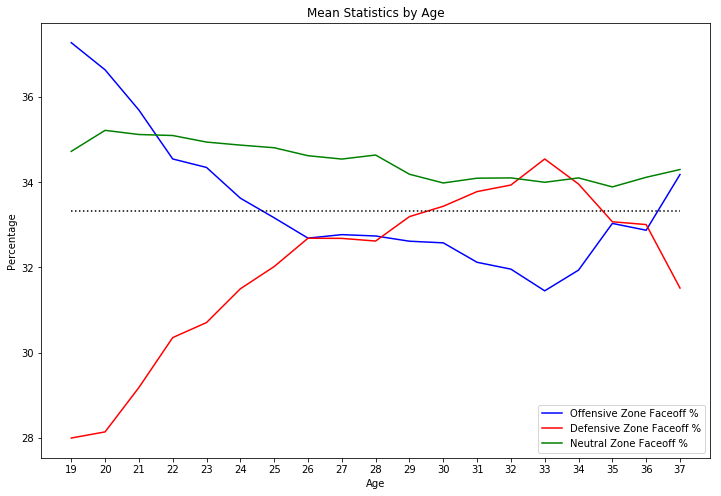

In [48]:
plt.plot(df_age_offz, color='blue', label='Offensive Zone Faceoff %')
plt.plot(df_age_defz, color='red', label='Defensive Zone Faceoff %')
plt.plot(df_age_neuz, color='green', label='Neutral Zone Faceoff %')
plt.plot([0,18],[33.333,33.333],linestyle='dotted', color='black')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='lower right')
plt.show()

The dotted line shows one third for percentage.  Since the total ice is divided into 3 areas, a balanced player would start one third of his time in each zone.  Makes sense that overall, players start most of the time in the neutral zone, since each period starts there and after each goal, plays resumes there.  The small window of time a player starts in their own defensive zone suggests perhaps coaches trust their experienced players more to start zone defense?  And even then, not for many years.

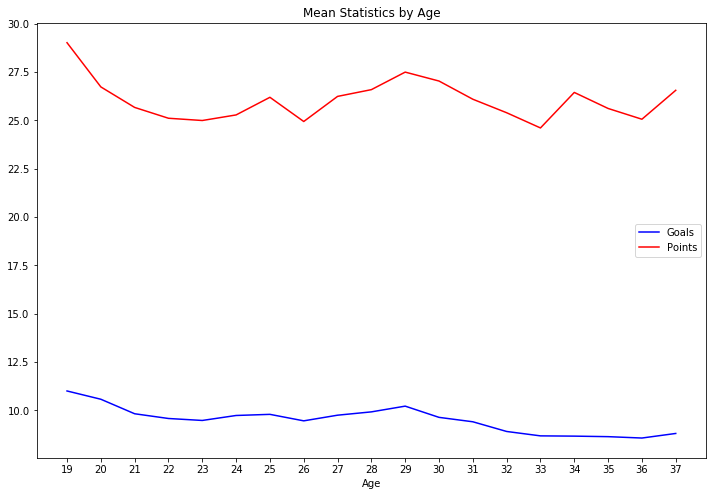

In [49]:
plt.plot(df_age_goal, color='blue', label='Goals')
plt.plot(df_age_pnt, color='red', label='Points')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='center right')
plt.show()

Another interesting graph.  I wonder if the high start for points suggests mainly very high caliber players start playing that young?  The rapid decline might show the attention those players get after their first year.  This also seems to suggest that a player's best year, on average, is 29.  And other than the strange dip at 26, 25 - 30 seems to be a good spread for player point production, with again, a strange spike at 34 and 37.  Perhaps survival bias?  And goal production seems to drop fairly steadily for a player after the peak at 29.  So, players tend to start hot, experience "growing pains" until around 23, then grow to peak performance around 29, after which they tend to decline.

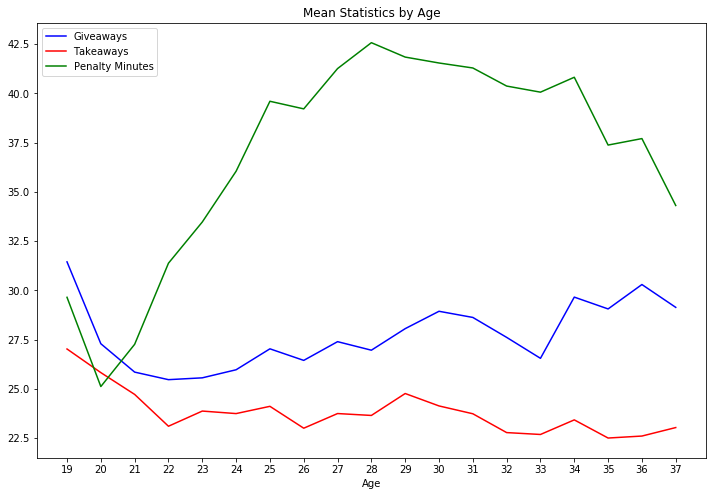

In [50]:
plt.plot(df_age_give, color='blue', label='Giveaways')
plt.plot(df_age_take, color='red', label='Takeaways')
plt.plot(df_age_pim, color='green', label='Penalty Minutes')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='upper left')
plt.show()

So, the average player starts clean, quickly tends to commit more penalties, maintaining an average of around 40 PIM per season from mid 20's to mid 30's, at which point their play cleans up again.  Giveaways is an interesting graph.  Right away, players tend to lose the puck often to the opposition, learning quickly until their early 20's, then steadily getting worse at it again almost consistently the rest of their career, other than a short improvement in their early 30's.  Takeaways though, tend to start high when players are young, drop off until their early 20's, and bounce around somewhat evenly till dropping off in their mid 30's.

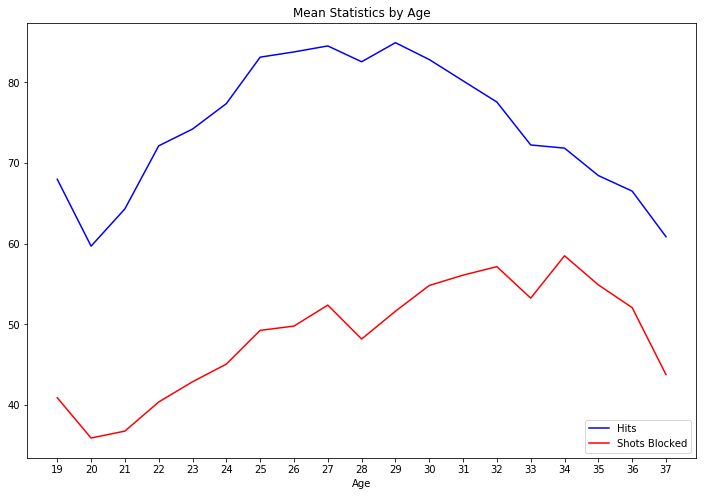

In [51]:
plt.plot(df_age_hit, color='blue', label='Hits')
plt.plot(df_age_sb, color='red', label='Shots Blocked')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='lower right')
plt.show()

So, hits tend to follow the goals and points pattern, with a player's best years between 24 and 30 roughly, building up before then and dropping off after then.  Young players need to learn how best to hit and older players become more worried about injuries perhaps.  Shot blocking though, shows a general rising until a player's mid 30's, after which it drops very quickly, probably due to the injury risk again.

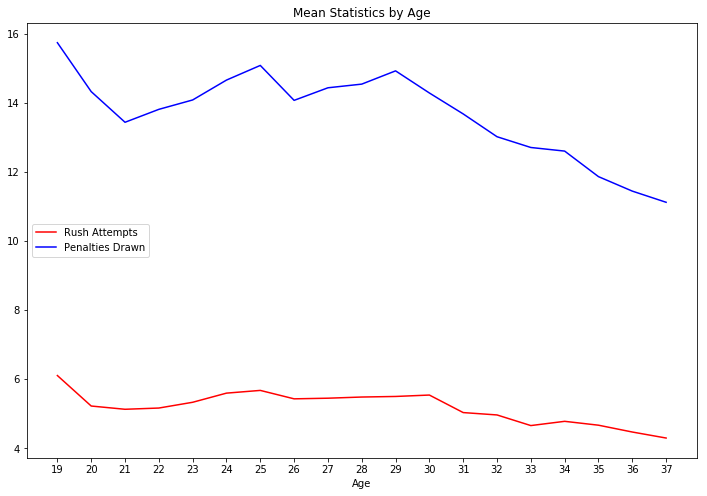

In [52]:
plt.plot(df_age_rush, color='red', label='Rush Attempts')
plt.plot(df_age_pend, color='blue', label='Penalties Drawn')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='center left')
plt.show()

Some low numbers in these graphs.  As before, the young players are perhaps quicker, forcing other players to commit penalties, and again, after a player peaks around 29, other players are less concerned about them, so less penalties are committed defending them.  Rush attempts are quite even across the board, declining a little after a player turns 30, as usual.

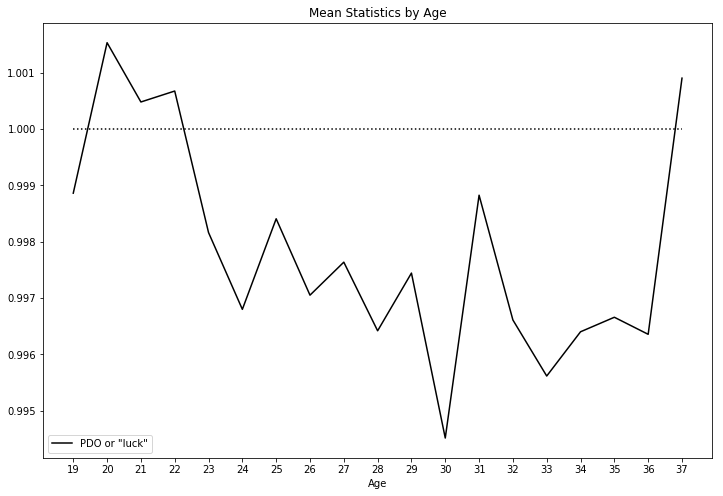

In [53]:
plt.plot(df_age_pdo, color='black', label='PDO or "luck"')
plt.plot([0,18],[1,1],linestyle='dotted', color='black')
plt.title('Mean Statistics by Age')
plt.xlabel('Age')
plt.xticks(np.arange(19), ('19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'))
plt.legend(loc='lower left')
plt.show()

The dotted line represents even "luck", neither lucky nor unlucky.  This graph seems to suggest a young player is more dependent on luck, and that dependency declines quickly into the player's peak production years and even through his mid 30's, at which point luck starts to become more important again.